<a href="https://colab.research.google.com/github/mmcuervo/ExamMLcategorias/blob/experimento/01_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#En este archivo analisamos los datos del dataset

In [21]:
# 1) Importar librerías básicas para EDA
import pandas as pd              # Manejo de datos en DataFrames
import numpy as np               # Utilidades numéricas (vectores, matrices, NaN)
import matplotlib.pyplot as plt  # Gráficas base
import seaborn as sns            # Gráficas estadísticas (opcional, solo EDA)
from pathlib import Path         # Manejo seguro de rutas de archivos


In [22]:
#Llamamos al dataset y creamos una copia para trabajar en ella y no tocar el original
from google.colab import drive
drive.mount('/content/drive')
DATA_PATH = "/content/drive/MyDrive/AiLabData/Support_tickets.csv"
df = pd.read_csv(DATA_PATH, encoding="utf-8")
dc = df.copy()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
#Verificamos el archivo
print("Dimensiones del dataset:" )
dc.info()
print(dc.isnull().sum())
print("\nNúmero de filas duplicadas:", dc.duplicated().sum())
pd.set_option('display.max_columns', None)
dc.head()

Dimensiones del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ticket_id               50000 non-null  int64  
 1   day_of_week             50000 non-null  object 
 2   day_of_week_num         50000 non-null  int64  
 3   company_id              50000 non-null  int64  
 4   company_size            50000 non-null  object 
 5   company_size_cat        50000 non-null  int64  
 6   industry                50000 non-null  object 
 7   industry_cat            50000 non-null  int64  
 8   customer_tier           50000 non-null  object 
 9   customer_tier_cat       50000 non-null  int64  
 10  org_users               50000 non-null  int64  
 11  region                  50000 non-null  object 
 12  region_cat              50000 non-null  int64  
 13  past_30d_tickets        50000 non-null  int64  
 14  past_90d_inci

,ticket_id,day_of_week,day_of_week_num,company_id,company_size,company_size_cat,industry,industry_cat,customer_tier,customer_tier_cat,org_users,region,region_cat,past_30d_tickets,past_90d_incidents,product_area,product_area_cat,booking_channel,booking_channel_cat,reported_by_role,reported_by_role_cat,customers_affected,error_rate_pct,downtime_min,payment_impact_flag,security_incident_flag,data_loss_flag,has_runbook,customer_sentiment,customer_sentiment_cat,description_length,priority,priority_cat
0,1000000000,Wed,3,100015,Small,1,media,7,Basic,1,126,APAC,3,2,0,mobile,3,web,1,support,1,2,5.451201,6,0,0,0,0,neutral,2,227,low,1
1,1000000001,Sat,6,100023,Small,1,healthcare,5,Basic,1,101,AMER,1,2,3,analytics,5,chat,3,product_manager,3,24,2.495538,2,0,0,0,0,neutral,2,461,low,1
2,1000000002,Mon,1,100012,Small,1,gaming,4,Basic,1,71,APAC,3,3,1,notifications,6,chat,3,devops,2,1,3.328402,0,0,0,0,1,positive,3,306,low,1
3,1000000003,Wed,3,100003,Small,1,media,7,Plus,2,100,AMER,1,2,2,analytics,5,chat,3,finance,4,25,2.931906,16,0,0,0,1,neutral,2,363,medium,2
4,1000000004,Mon,1,100019,Small,1,ecommerce,2,Plus,2,332,AMER,1,5,1,analytics,5,web,1,support,1,28,3.255222,6,0,0,0,0,neutral,2,442,low,1


**Descripción de la información:**

Tenemos 32 columnas en principio son muchas, sin embargo podemos observar que las columnas terminadas en num y cat son la repesentación numérica de varias columnas categóricas por lo que son redundates y podemos eliminarlas para solo quedarnos con las columnas categóricas.   

Tenemos 50k filas de las cuales 906 son nulas todas están en el categoría customer_sentiment, es decir es el unico valor categórico con valores nulos.

Devemos verificar si hay ceros como valor nulo en otras categorias, esto lo observaremos cuando evaluemos las subcategorías de las columnas.

También puedo observar que ticket_id es irrelevante para el análisis y mantenerlo puede ser un problema porque genera 50k subcategorías, no hay frecuencias por se valores únicos.

**Conclusión:**
1) Eliminar ticket_id
2) Hacer una verificación y análisis de riesgos de valores nulos en sentimientos
3) Hacer un análisis de las subcategorias en los valores categóricos para detectar valores nulos, o redundancias por escritura (ej: Samall, small, Smal, smal, etc)


In [24]:
#Eliminamos la columna ticket_id del dataset
dc.drop(columns='ticket_id', inplace=True)
dc.head()

,day_of_week,day_of_week_num,company_id,company_size,company_size_cat,industry,industry_cat,customer_tier,customer_tier_cat,org_users,region,region_cat,past_30d_tickets,past_90d_incidents,product_area,product_area_cat,booking_channel,booking_channel_cat,reported_by_role,reported_by_role_cat,customers_affected,error_rate_pct,downtime_min,payment_impact_flag,security_incident_flag,data_loss_flag,has_runbook,customer_sentiment,customer_sentiment_cat,description_length,priority,priority_cat
0,Wed,3,100015,Small,1,media,7,Basic,1,126,APAC,3,2,0,mobile,3,web,1,support,1,2,5.451201,6,0,0,0,0,neutral,2,227,low,1
1,Sat,6,100023,Small,1,healthcare,5,Basic,1,101,AMER,1,2,3,analytics,5,chat,3,product_manager,3,24,2.495538,2,0,0,0,0,neutral,2,461,low,1
2,Mon,1,100012,Small,1,gaming,4,Basic,1,71,APAC,3,3,1,notifications,6,chat,3,devops,2,1,3.328402,0,0,0,0,1,positive,3,306,low,1
3,Wed,3,100003,Small,1,media,7,Plus,2,100,AMER,1,2,2,analytics,5,chat,3,finance,4,25,2.931906,16,0,0,0,1,neutral,2,363,medium,2
4,Mon,1,100019,Small,1,ecommerce,2,Plus,2,332,AMER,1,5,1,analytics,5,web,1,support,1,28,3.255222,6,0,0,0,0,neutral,2,442,low,1


# **ANALISIS DE IMPORTANCIA DE LOS DATOS NULOS EN custimer_sentiment**

In [30]:
# Despliego las columnas para verificar los nulos
rows_with_nulls = df[df.isnull().any(axis=1)]
display(rows_with_nulls)

,ticket_id,day_of_week,day_of_week_num,company_id,company_size,company_size_cat,industry,industry_cat,customer_tier,customer_tier_cat,org_users,region,region_cat,past_30d_tickets,past_90d_incidents,product_area,product_area_cat,booking_channel,booking_channel_cat,reported_by_role,reported_by_role_cat,customers_affected,error_rate_pct,downtime_min,payment_impact_flag,security_incident_flag,data_loss_flag,has_runbook,customer_sentiment,customer_sentiment_cat,description_length,priority,priority_cat
12,1000000012,Thu,4,100007,Large,3,media,7,Enterprise,3,5757,EMEA,2,8,4,mobile,3,phone,4,support,1,276,4.033129,0,0,0,0,1,NaN,0,556,medium,2
64,1000000064,Tue,2,100018,Large,3,saas_b2b,3,Plus,2,5721,AMER,1,5,4,analytics,5,phone,4,devops,2,260,1.349495,0,0,0,0,0,NaN,0,387,medium,2
115,1000000115,Fri,5,100016,Medium,2,ecommerce,2,Basic,1,454,APAC,3,3,2,notifications,6,phone,4,devops,2,10,4.900837,0,0,0,0,0,NaN,0,285,low,1
166,1000000166,Thu,4,100019,Small,1,ecommerce,2,Plus,2,332,AMER,1,1,2,analytics,5,phone,4,support,1,3,6.892648,0,0,0,0,1,NaN,0,250,low,1
233,1000000233,Fri,5,100013,Medium,2,media,7,Plus,2,701,APAC,3,0,2,mobile,3,phone,4,support,1,32,1.099349,0,0,0,0,1,NaN,0,403,low,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49721,1000049721,Thu,4,100007,Large,3,media,7,Enterprise,3,5757,AMER,1,10,2,analytics,5,phone,4,support,1,1724,0.958870,11,0,0,0,1,NaN,0,492,high,3
49795,1000049795,Mon,1,100007,Large,3,media,7,Enterprise,3,5757,AMER,1,8,4,notifications,6,phone,4,finance,4,381,1.456633,0,0,0,0,1,NaN,0,468,medium,2
49862,1000049862,Fri,5,100005,Large,3,logistics,6,Plus,2,4799,AMER,1,8,2,billing,2,phone,4,support,1,563,0.811092,41,0,0,0,1,NaN,0,468,high,3
49939,1000049939,Mon,1,100020,Medium,2,gaming,4,Plus,2,481,AMER,1,2,4,analytics,5,phone,4,product_manager,3,29,2.491362,3,0,0,0,0,NaN,0,344,low,1


Solo los ceros de customer_sentiment_cat son información nula, los demás son información válida.

** Conclusión:** Analizar la importancia de mantener, declarar faltantes o imputar los datos nulos, para esto ustilizaremos Ch^2 para ver si existe asociaicón estadisiticamente significativa entre prioridad y sentimiento y revisaremos como se distribuyen los faltantes en las otras categorías.

In [31]:
from scipy.stats import chi2_contingency

col_label = "customer_sentiment"
col_code  = "customer_sentiment_cat"

# Normalizamos SOLO el dtype de customer_sentiment_cat (no tocamos otras columnas)
dc[col_code] = pd.to_numeric(dc[col_code], errors="coerce").astype("Int64")

#Definimos "faltante de sentimiento" EXCLUSIVAMENTE:
mask_missing_cs = dc[col_label].isna() | (dc[col_code] == 0)

print(f"Filas marcadas como faltantes de sentimiento: {mask_missing_cs.sum()} de {len(dc)} "
      f"({mask_missing_cs.mean()*100:.2f}%)")

# Impacto en balance de la clase objetivo si eliminamos esas filas
orig  = dc["priority"].value_counts(normalize=True).rename("original")
after = dc.loc[~mask_missing_cs, "priority"].value_counts(normalize=True).rename("sin_missing")
balance_comp = pd.concat([orig, after], axis=1).fillna(0)
display((balance_comp*100).round(2))  # % por clase antes vs después

# Asociación estadística entre "faltante de sentimiento" y priority
ct = pd.crosstab(dc["priority"], mask_missing_cs)
chi2, p, dof, expected = chi2_contingency(ct)
print("Chi2 p-value (asociación missing_sentiment ~ priority):", p)

# Uso crosstab para ver % de faltante por categoría de cada columna
cand_cols = [c for c in ["industry","region","customer_tier"] if c in dc.columns]

Filas marcadas como faltantes de sentimiento: 906 de 50000 (1.81%)


,original,sin_missing
priority,,
low,50.0,50.30
medium,35.0,34.87
high,15.0,14.82


Chi2 p-value (asociación missing_sentiment ~ priority): 2.179712127441409e-26


Aunque las filas con faltantes repressntan solo el 1.8% de la tabla, su impacto de acuerdo a Chi2 es **muy alto**, p< 0.05, p= 2.179712127441409**e-26**, mucho más pequño que 0.05, una muestra de 50k observaciones pued dar una p pequeño por lo que vale la pena verificar, si esta relación no aleatoria tiene consecuencias significativas prácicas.

**Conclusión:** la relación entre sentimiento y prioridad es estadísticamente significativa, es decir, no es aleatorioa, sin embargo por tratarse de una muestra grande será necesario aplicar una prueba de V de cramer para confirmar su relevancia.

In [32]:
#Verificamos como se distribuyen los faltantes en las otras columnas
for col in cand_cols:
    print(f"\n% faltante de sentimiento por {col} (top 10):")
    tab = pd.crosstab(dc[col], mask_missing_cs).reindex(columns=[True, False], fill_value=0)
    rates = (tab[True] / tab.sum(axis=1)).sort_values(ascending=False).head(10)
    display((rates*100).round(2))


% faltante de sentimiento por industry (top 10):


,0
industry,
logistics,2.59
fintech,2.24
saas_b2b,2.17
healthcare,1.79
media,1.68
gaming,1.36
ecommerce,1.03



% faltante de sentimiento por region (top 10):


,0
region,
AMER,2.72
EMEA,1.91
APAC,0.73



% faltante de sentimiento por customer_tier (top 10):


,0
customer_tier,
Enterprise,2.55
Plus,2.17
Basic,0.74


La distribución de la proporción de los faltantes no es uniforme, podemos ver que Logistics, fintech y saas_b2b tienen mayor concentración, al igual que la región de América y los clientes de tipo Enterprise esto podría significar que esas industrias y tipos de cliente son menos propensos a expresar sentimiento, y también podría mostrar una relación entre el tipo de industria y el nivel de cliente. Algo muy claro es que quien tiene el servicio básico es más propenso a mostrar sentimiento en su interacción. ¿serán los clientes más enojados?

**Conclusión:** La distribución de los datos nulos no es aleatorio, hay un dferencia significativa entre quienes tienen el plan básico y el empresarial.

In [33]:
#Realizamo la evaluación de V de Cramer
# Tabla de contingencia priority x missing_sentiment
ct = pd.crosstab(dc["priority"], dc["customer_sentiment"].isna() | (dc["customer_sentiment_cat"] == 0))

chi2, p, dof, expected = chi2_contingency(ct)
n = ct.to_numpy().sum()
phi2 = chi2 / n
r, k = ct.shape
V = np.sqrt(phi2 / min(r-1, k-1))

print("Chi2:", chi2, "| dof:", dof, "| p-value:", p)
print("Cramér’s V:", V)

# Extras de “practicidad”:
rate_by_priority = (ct[True] / ct.sum(axis=1)).sort_index()  # % faltante por clase
print("\n% faltante por priority:")
print((rate_by_priority*100).round(3))
print("Diferencia máxima de % entre clases:", (rate_by_priority.max()-rate_by_priority.min())*100, "pp")

Chi2: 118.17603920279231 | dof: 2 | p-value: 2.179712127441409e-26
Cramér’s V: 0.0486160547973182

% faltante por priority:
priority
high      2.960
low       1.216
medium    2.171
dtype: float64
Diferencia máxima de % entre clases: 1.744 pp


La V de cramer es 0.0486160547973182 lo que implica que la relación es débil y de poca importancia práctica V<0.30.

**Análisis de las 3 pruebas en su conjunto:**

1) P es muy cercana cero en el órden de e-26 por lo que su importancia estadística es muy alta.
2) La distribución de los nulos entre el tipo de cliente muestra una relación entre el nivel de cliente y la expresión de sentimientos.
3) V es muy debil V=0.04 pero no lo suficientemente debil (ej v=0.005) para ignorar el valor de P

***Discusión***

Aunque la importancia práctica de la relación (V) es débil no es lo suficientementre débil como para ignorar el hecho de que no es aletoria (P) y a que también tiene relevancia en otras categorías, como el caso de nivel de cliente por lo que eliminarla o imputarla podría causar sesgo.

**Conclusión:**

Se mantienen las filas con datos nulos en sentimiento y cambiamos el valor NaN por UNKNOWN_SENTIMENT para evitar problemas en los modelos.

In [34]:
# === Normalizar y rellenar customer_sentiment / customer_sentiment_cat ===

SENT_LABEL = "customer_sentiment"
SENT_CODE  = "customer_sentiment_cat"
UNKNOWN_LBL = "UNKNOWN_SENTIMENT"
UNKNOWN_CODE = 0  # solo en esta columna 0 == "sin dato"

# 1) Tipos consistentes
dc[SENT_CODE] = pd.to_numeric(dc[SENT_CODE], errors="coerce").astype("Int64")
if dc[SENT_LABEL].dtype.name != "category":
    dc[SENT_LABEL] = dc[SENT_LABEL].astype("category")
if UNKNOWN_LBL not in dc[SENT_LABEL].cat.categories:
    dc[SENT_LABEL] = dc[SENT_LABEL].cat.add_categories([UNKNOWN_LBL])

# 2) Diccionario code -> label a partir de filas válidas (resuelve conflictos con modo)
both = dc[[SENT_CODE, SENT_LABEL]].dropna()
code2label = (both.groupby(SENT_CODE)[SENT_LABEL]
                 .agg(lambda s: s.mode().iat[0])
                 .to_dict())
# Forzamos el código 0 a mapear a UNKNOWN
code2label[UNKNOWN_CODE] = UNKNOWN_LBL

# 3) Rellenos
# 3a) NaN de código -> 0 (único caso donde 0 significa "sin dato")
before_code_na = int(dc[SENT_CODE].isna().sum())
dc[SENT_CODE] = dc[SENT_CODE].fillna(UNKNOWN_CODE)
after_code_na = int(dc[SENT_CODE].isna().sum())

# 3b) Label NaN o code==0 -> usar mapeo (o UNKNOWN si no hay mapeo)
before_lbl_na = int(dc[SENT_LABEL].isna().sum())
mask_fill = dc[SENT_LABEL].isna() | (dc[SENT_CODE] == UNKNOWN_CODE)
dc.loc[mask_fill, SENT_LABEL] = dc.loc[mask_fill, SENT_CODE].map(code2label).fillna(UNKNOWN_LBL)
after_lbl_na = int(dc[SENT_LABEL].isna().sum())

print(f"NaN en código antes: {before_code_na} | después: {after_code_na}")
print(f"NaN en label  antes: {before_lbl_na} | después: {after_lbl_na}")

# 4) Revisamos resultado
print("\nCruce código vs. label (muestra):")
display(pd.crosstab(dc[SENT_CODE], dc[SENT_LABEL]).head(10))

print("\nTop categorías de 'customer_sentiment' (%):")
display((dc[SENT_LABEL].value_counts(normalize=True)*100).round(2).head(10))

NaN en código antes: 0 | después: 0
NaN en label  antes: 0 | después: 0

Cruce código vs. label (muestra):


customer_sentiment,negative,neutral,positive,UNKNOWN_SENTIMENT
customer_sentiment_cat,,,,
0,0,0,0,906
1,11317,0,0,0
2,0,32944,0,0
3,0,0,4833,0



Top categorías de 'customer_sentiment' (%):


,proportion
customer_sentiment,
neutral,65.89
negative,22.63
positive,9.67
UNKNOWN_SENTIMENT,1.81


Confirmamos que se cambiaron todos los NaN por UNKNOWN_SENTIMENT y que representan el 1.8% de los datos, número que ya teníamos en el análisis previo.

**Conclusión:** Podemos seguir con el sigueinte paso, los datos nulos ya son información relevante

# **ANALISIS DE SUBCATEGORIAS número de subcategorías, no redundancias, ceros como datos nulos**

In [18]:
#Cuento los diferentes niveles en las diferentes columnas categóricas
cols_cat=['day_of_week','company_id','company_size','industry','customer_tier','region','product_area',
          'booking_channel','reported_by_role','customer_sentiment','priority']
for col in cols_cat:
  print(f'Columna {col}:{df[col].nunique()} subcategorias')

#for col in cols_cat:
 # print(df[col].value_counts())

Columna day_of_week:7 subcategorias
Columna company_id:25 subcategorias
Columna company_size:3 subcategorias
Columna industry:7 subcategorias
Columna customer_tier:3 subcategorias
Columna region:3 subcategorias
Columna product_area:6 subcategorias
Columna booking_channel:4 subcategorias
Columna reported_by_role:5 subcategorias
Columna customer_sentiment:3 subcategorias
Columna priority:3 subcategorias


Company_id tiene 25 subcatrgorías mientras que las demás están entre 3 y 7, esto me podría causar un problemas de colinealidad,

**Conclusión:** Analizar más adelante la conveniencia o no de eliminar company_id

# **Resto del cosigo por revisar**

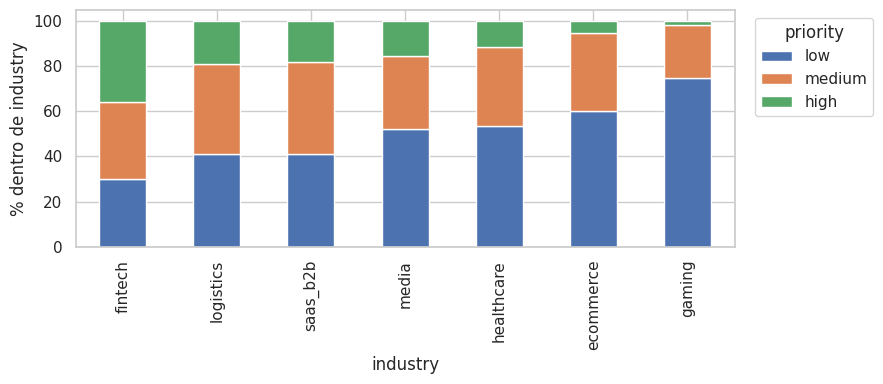

priority,low,medium,high
industry,,,
fintech,29.800,34.530,35.670
logistics,41.270,39.850,18.880
saas_b2b,41.280,40.730,17.990
media,52.120,32.340,15.540
healthcare,53.630,34.860,11.510
ecommerce,60.250,34.630,5.120
gaming,74.990,23.200,1.800


In [27]:


cat_col = "industry"        # cámbialo a "region", "customer_tier", etc.
target  = "priority"

# Tabla porcentaje por fila (cada industry suma 100%)
norm_tab = pd.crosstab(dc[cat_col], dc[target], normalize="index") \
             .reindex(columns=["low","medium","high"]) * 100

# (Opcional) ordenar industrias por % de 'high' descendente
norm_tab = norm_tab.sort_values("high", ascending=False)

# Graficar 100% stacked bar
ax = norm_tab.plot(kind="bar", stacked=True, figsize=(9,4))
ax.set_ylabel("% dentro de " + cat_col)
ax.set_xlabel(cat_col)
ax.legend(title=target, bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

# (Opcional) ver tabla
display(norm_tab.round(2).head(10))


In [28]:
# === Paso A: Escanear columnas a eliminar (DRY RUN) ===
import re
import pandas as pd
import numpy as np

KEEP_IDS = {"company_id"}  #esta es una categoría
dc0 = dc.copy()

# 1) Códigos de categorías *_cat con columna base presente
cat_pairs = []
cat_to_drop = []
cat_orphans = []  # *_cat sin columna base -> NO se borran automático
for col in dc0.columns:
    if col.endswith("_cat"):
        base = col[:-4]
        if base in dc0.columns:
            cat_pairs.append((base, col))
            cat_to_drop.append(col)
        else:
            cat_orphans.append(col)

# 2) IDs candidatos (nombre con '_id' o 'id' separado), excepto los que queremos conservar
id_candidates = []
ids_to_drop = []
for col in dc0.columns:
    name = col.lower()
    if col in KEEP_IDS:
        continue
    # patrón de nombre que sugiere ID (p. ej., ticket_id, requester_id, userId, etc.)
    if name.endswith("_id") or re.search(r'(^|_)id($|_)', name):
        s = dc0[col]
        # excluir banderas 0/1
        if pd.api.types.is_numeric_dtype(s):
            vals = s.dropna().unique()
            if len(vals) == 2 and set(vals) <= {0, 1}:
                continue
        # registrar candidato
        nunique = dc0[col].nunique(dropna=True)
        ratio = nunique / len(dc0)
        id_candidates.append((col, nunique, ratio))
        ids_to_drop.append(col)

print("=== PROPUESTA ===")
print(f"- Pares *_cat encontrados (base, code): {len(cat_pairs)}")
print("  Ejemplos:", cat_pairs[:5])
print(f"- *_cat a eliminar (por ser duplicados del label): {len(cat_to_drop)}")
print("  Ejemplos:", cat_to_drop[:10])

if cat_orphans:
    print(f"\n[AVISO] *_cat sin columna base (NO se eliminarán automáticamente): {len(cat_orphans)}")
    print("  Ejemplos:", cat_orphans[:10])

print("\n- IDs candidatos (excepto KEEP_IDS):")
for col, nu, r in sorted(id_candidates, key=lambda x: -x[2])[:12]:
    print(f"  {col:25s}  únicos={nu:6d}  ratio={r:6.3f}")

print(f"\n- IDs propuestos a eliminar (excluyendo {KEEP_IDS}): {len(ids_to_drop)}")
print("  Ejemplos:", ids_to_drop[:10])

# Resumen final (no se borró nada aún)
print("\nResumen:")
print(f"  *_cat para eliminar: {len(cat_to_drop)}")
print(f"  IDs para eliminar (excl. KEEP_IDS): {len(ids_to_drop)}")


=== PROPUESTA ===
- Pares *_cat encontrados (base, code): 9
  Ejemplos: [('company_size', 'company_size_cat'), ('industry', 'industry_cat'), ('customer_tier', 'customer_tier_cat'), ('region', 'region_cat'), ('product_area', 'product_area_cat')]
- *_cat a eliminar (por ser duplicados del label): 9
  Ejemplos: ['company_size_cat', 'industry_cat', 'customer_tier_cat', 'region_cat', 'product_area_cat', 'booking_channel_cat', 'reported_by_role_cat', 'customer_sentiment_cat', 'priority_cat']

- IDs candidatos (excepto KEEP_IDS):
  ticket_id                  únicos= 50000  ratio= 1.000

- IDs propuestos a eliminar (excluyendo {'company_id'}): 1
  Ejemplos: ['ticket_id']

Resumen:
  *_cat para eliminar: 9
  IDs para eliminar (excl. KEEP_IDS): 1


In [29]:
# === Paso B: Aplicar borrado confirmado ===
TO_DROP = list(set(cat_to_drop) | set(ids_to_drop))  # de Paso A
print(f"Columnas a borrar: {len(TO_DROP)}")
print(TO_DROP[:20])

dc = dc.drop(columns=TO_DROP).copy()
print("Nuevo shape de dc:", dc.shape)

Columnas a borrar: 10
['customer_tier_cat', 'customer_sentiment_cat', 'product_area_cat', 'reported_by_role_cat', 'region_cat', 'industry_cat', 'priority_cat', 'company_size_cat', 'ticket_id', 'booking_channel_cat']
Nuevo shape de dc: (50000, 23)


In [31]:
dc.head()


,day_of_week,day_of_week_num,company_id,company_size,industry,customer_tier,org_users,region,past_30d_tickets,past_90d_incidents,...,customers_affected,error_rate_pct,downtime_min,payment_impact_flag,security_incident_flag,data_loss_flag,has_runbook,customer_sentiment,description_length,priority
0,Wed,3,100015,Small,media,Basic,126,APAC,2,0,...,2,5.451,6,0,0,0,0,neutral,227,low
1,Sat,6,100023,Small,healthcare,Basic,101,AMER,2,3,...,24,2.496,2,0,0,0,0,neutral,461,low
2,Mon,1,100012,Small,gaming,Basic,71,APAC,3,1,...,1,3.328,0,0,0,0,1,positive,306,low
3,Wed,3,100003,Small,media,Plus,100,AMER,2,2,...,25,2.932,16,0,0,0,1,neutral,363,medium
4,Mon,1,100019,Small,ecommerce,Plus,332,AMER,5,1,...,28,3.255,6,0,0,0,0,neutral,442,low


In [34]:
#Se escapó la day_ofweek_num porque no tiene cat
dc = dc.drop(columns=["day_of_week_num"], errors="ignore")
dc.head()

,day_of_week,company_id,company_size,industry,customer_tier,org_users,region,past_30d_tickets,past_90d_incidents,product_area,...,customers_affected,error_rate_pct,downtime_min,payment_impact_flag,security_incident_flag,data_loss_flag,has_runbook,customer_sentiment,description_length,priority
0,Wed,100015,Small,media,Basic,126,APAC,2,0,mobile,...,2,5.451,6,0,0,0,0,neutral,227,low
1,Sat,100023,Small,healthcare,Basic,101,AMER,2,3,analytics,...,24,2.496,2,0,0,0,0,neutral,461,low
2,Mon,100012,Small,gaming,Basic,71,APAC,3,1,notifications,...,1,3.328,0,0,0,0,1,positive,306,low
3,Wed,100003,Small,media,Plus,100,AMER,2,2,analytics,...,25,2.932,16,0,0,0,1,neutral,363,medium
4,Mon,100019,Small,ecommerce,Plus,332,AMER,5,1,analytics,...,28,3.255,6,0,0,0,0,neutral,442,low


In [37]:
# === Paso 2A (ajustado): incluir company_id en el resumen de categóricas ===

TARGET = "priority"

# 1) Detectar categóricas "naturales"
cat_natural = dc.select_dtypes(include=["object","category","bool"]).columns.tolist()

# 2) Añadir banderas 0/1 numéricas como categóricas para el EDA
num_cols = dc.select_dtypes(include=[np.number]).columns.tolist()
bin_as_cat = [c for c in num_cols if c != TARGET and dc[c].dropna().isin([0,1]).all()]

# 3) Unir y forzar inclusión de company_id si existe
base_cols = cat_natural + bin_as_cat
if "company_id" in dc.columns:
    base_cols = base_cols + ["company_id"]

# quitar duplicados y excluir el target
cat_cols = [c for c in dict.fromkeys(base_cols) if c != TARGET]

print(f"Variables categóricas detectadas (incluye banderas 0/1 y company_id si existe): {len(cat_cols)}")
print(cat_cols[:25])

# 4) Resumen por columna
rows = []
for col in cat_cols:
    s = dc[col]
    n = len(s)
    miss_pct = s.isna().mean()*100
    card = s.nunique(dropna=True)
    vc = (s.astype("category").value_counts(normalize=True, dropna=True).head(5) * 100).round(2)
    top_str = "; ".join([f"{k}: {v:.2f}%" for k, v in vc.items()])
    nota = "ID empresa (alta cardinalidad)" if col == "company_id" else ""
    rows.append({
        "columna": col,
        "tipo": str(s.dtype),
        "cardinalidad": int(card),
        "missing_%": round(miss_pct, 2),
        "top5_%": top_str,
        "nota": nota
    })

cat_summary = (pd.DataFrame(rows)
               .sort_values(["missing_%","cardinalidad"], ascending=[False, False])
               .reset_index(drop=True))

pd.set_option("display.max_colwidth", 140)
display(cat_summary)



Variables categóricas detectadas (incluye banderas 0/1 y company_id si existe): 14
['day_of_week', 'company_size', 'industry', 'customer_tier', 'region', 'product_area', 'booking_channel', 'reported_by_role', 'customer_sentiment', 'payment_impact_flag', 'security_incident_flag', 'data_loss_flag', 'has_runbook', 'company_id']


,columna,tipo,cardinalidad,missing_%,top5_%,nota
0,company_id,int64,25,0.000,100007: 5.73%; 100002: 5.68%; 100018: 5.54%; 100010: 5.50%; 100005: 5.44%,ID empresa (alta cardinalidad)
1,day_of_week,object,7,0.000,Mon: 22.25%; Tue: 18.83%; Thu: 18.26%; Wed: 18.00%; Fri: 17.60%,
2,industry,object,7,0.000,saas_b2b: 26.21%; media: 23.86%; ecommerce: 15.34%; gaming: 9.87%; fintech: 8.91%,
3,product_area,object,6,0.000,mobile: 20.01%; analytics: 19.80%; auth: 19.41%; notifications: 19.38%; billing: 11.63%,
4,reported_by_role,object,5,0.000,support: 47.15%; devops: 20.76%; product_manager: 15.06%; finance: 10.88%; c_level: 6.14%,
5,booking_channel,object,4,0.000,web: 35.18%; email: 29.24%; chat: 23.51%; phone: 12.07%,
6,customer_sentiment,category,4,0.000,neutral: 65.89%; negative: 22.63%; positive: 9.67%; UNKNOWN_SENTIMENT: 1.81%,
7,company_size,object,3,0.000,Small: 37.80%; Medium: 34.32%; Large: 27.88%,
8,customer_tier,object,3,0.000,Plus: 43.93%; Basic: 31.39%; Enterprise: 24.67%,
9,region,object,3,0.000,AMER: 34.21%; EMEA: 34.13%; APAC: 31.66%,


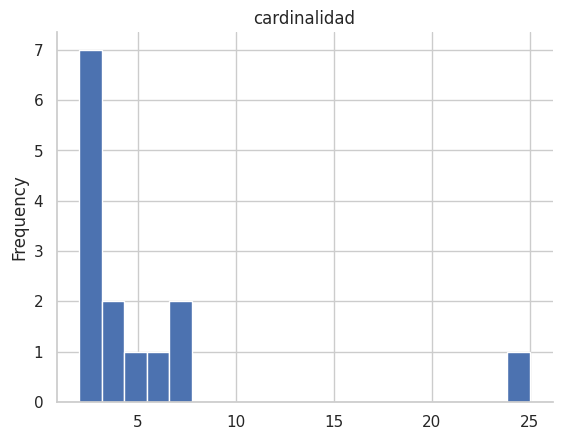

In [38]:
# @title cardinalidad

from matplotlib import pyplot as plt
cat_summary['cardinalidad'].plot(kind='hist', bins=20, title='cardinalidad')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [44]:
def plot_norm_by_priority(df, cat_col, target="priority", target_order=("low","medium","high"), top_k=None):
    import pandas as pd
    import matplotlib.pyplot as plt

    tmp = df[[cat_col, target]].copy()

    # Asegurar orden del target
    if target in tmp.columns:
        tmp[target] = pd.Categorical(tmp[target], categories=list(target_order), ordered=True)

    # --- CLAVE: convertir categóricas a object/str antes de llenar nulos ---
    s = tmp[cat_col].copy()
    if pd.api.types.is_categorical_dtype(s):
        s = s.astype("object")
    s = s.fillna("Missing").astype(str)  # ya no choca con categorías

    # Top-K + 'Other' (opcional)
    if top_k is not None and s.nunique() > top_k:
        top_vals = s.value_counts().head(top_k).index
        s = s.where(s.isin(top_vals), other="Other")

    # Crosstab normalizada por fila (100%)
    tab = pd.crosstab(s, tmp[target], normalize="index") * 100

    # Reordenar columnas del target
    cols = [c for c in target_order if c in tab.columns]
    tab = tab.reindex(columns=cols)

    # Ordenar filas por % de 'high' si existe, si no por la última col disponible
    sort_col = "high" if "high" in tab.columns else cols[-1]
    tab = tab.sort_values(sort_col, ascending=False)

    # Plot
    ax = tab.plot(kind="bar", stacked=True, figsize=(10, 4), edgecolor="none")
    ax.set_title(f"Composición de {target} dentro de {cat_col} (100% apilada)")
    ax.set_ylabel(f"% de {target} dentro de {cat_col}")
    ax.set_xlabel(cat_col)
    ax.legend(title=target, bbox_to_anchor=(1.02, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

    return tab.round(2)




/tmp/ipython-input-530776482.py:13: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(s):


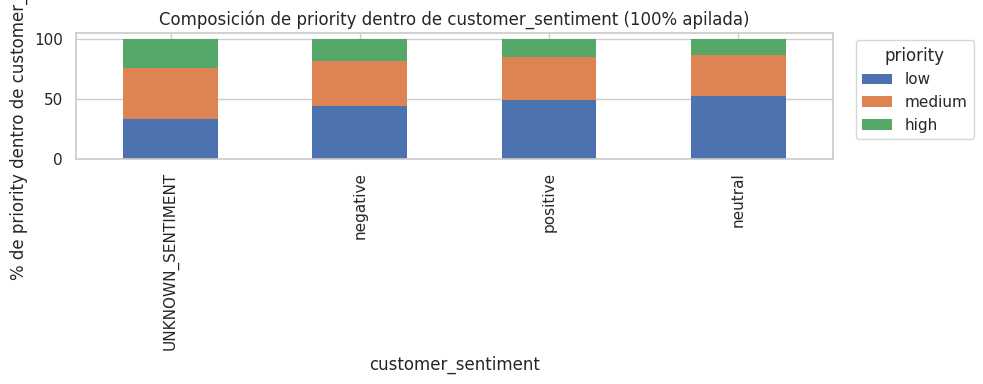

In [45]:
tab_sentiment = plot_norm_by_priority(dc, "customer_sentiment")


Prioridad vs Sentimiento: Las desconocidad sonlas más urgentes y después negativo pero con poca diferencia.

Conclusión: Poca correlación

/tmp/ipython-input-530776482.py:13: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(s):


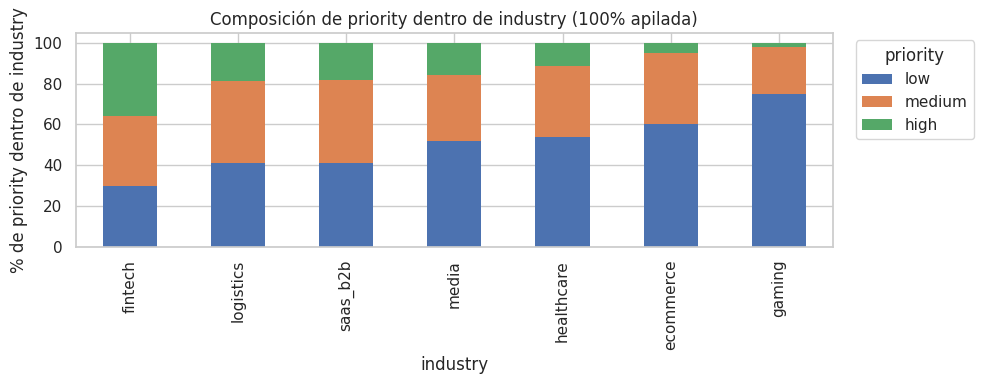

In [46]:
tab_industry       = plot_norm_by_priority(dc, "industry")

Fintec tiene casi 20 puntos de diferencia sobre lofística, saas_b3b y media que son muy similares,  ecommerce y gaming, tienen muy poca prioridad.

**Conclusión **alta relación entre industría y prioridad

/tmp/ipython-input-530776482.py:13: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(s):


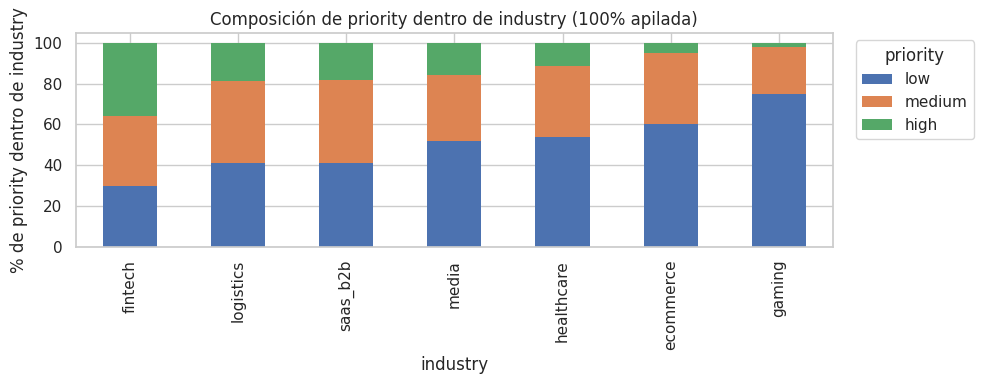

In [47]:
tab_industry       = plot_norm_by_priority(dc, "industry")

/tmp/ipython-input-530776482.py:13: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(s):


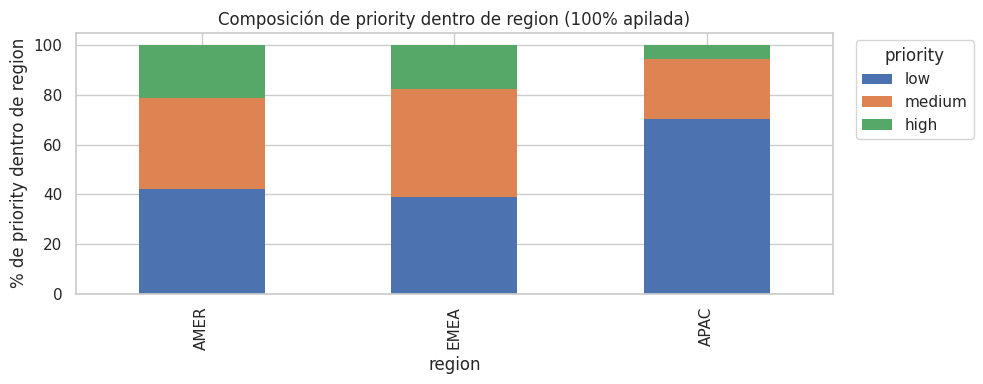

In [50]:
tab_region         = plot_norm_by_priority(dc, "region")

AMER y EMEA son practicamente iguales, pero APAC tiene una diferencia muy marcada de menos prioridad, podría deberse a que en esa región hay más industrias de poca prioridad. HABRÁ QUE CONTRASTARLAS

/tmp/ipython-input-2907672177.py:9: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(s):
/tmp/ipython-input-2907672177.py:9: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(s):


region,AMER,APAC,EMEA
industry,,,
ecommerce,1941,3470,2261
fintech,1899,939,1619
gaming,2048,2887,0
healthcare,1539,0,2196
logistics,3001,0,1162
media,3323,5241,3367
saas_b2b,3352,3295,6460


region,AMER,APAC,EMEA
industry,,,
ecommerce,25.300,45.230,29.470
fintech,42.610,21.070,36.320
gaming,41.500,58.500,0.000
healthcare,41.200,0.000,58.800
logistics,72.090,0.000,27.910
media,27.850,43.930,28.220
saas_b2b,25.570,25.140,49.290


region,AMER,APAC,EMEA
industry,,,
ecommerce,11.350,21.920,13.250
fintech,11.100,5.930,9.490
gaming,11.970,18.240,0.000
healthcare,9.000,0.000,12.870
logistics,17.550,0.000,6.810
media,19.430,33.100,19.730
saas_b2b,19.600,20.810,37.860


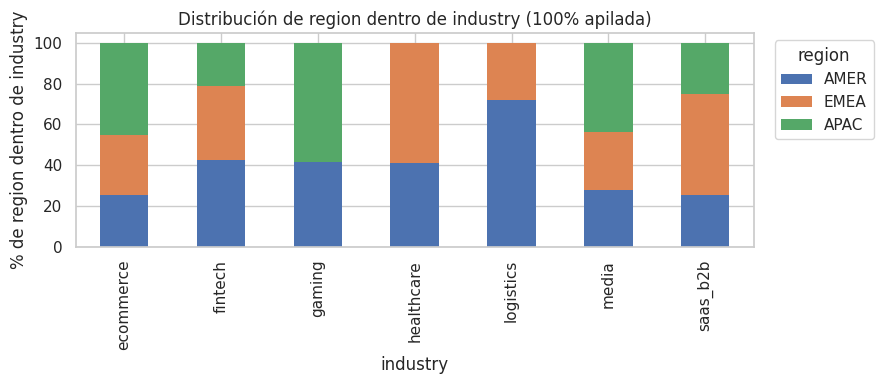

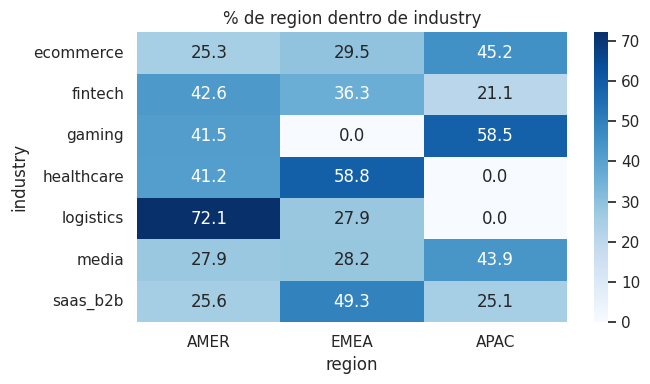

In [57]:

cat_a = "industry"
cat_b = "region"

tmp = dc[[cat_a, cat_b]].copy()

# Aseguramos etiquetas legibles (evita choques con Categorical)
for c in [cat_a, cat_b]:
    s = tmp[c]
    if pd.api.types.is_categorical_dtype(s):
        s = s.astype("object")
    tmp[c] = s.fillna("Missing").astype(str)

# 1) Conteos crudos
ct_counts = pd.crosstab(tmp[cat_a], tmp[cat_b])
display(ct_counts)

# 2) % por fila: P(region | industry)
ct_row_pct = pd.crosstab(tmp[cat_a], tmp[cat_b], normalize="index") * 100
display(ct_row_pct.round(2))

# 3) % por columna: P(industry | region)
ct_col_pct = pd.crosstab(tmp[cat_a], tmp[cat_b], normalize="columns") * 100
display(ct_col_pct.round(2))

# 4) Barra 100% apilada (ordenando columnas si existen)
order_regions = [c for c in ["AMER","EMEA","APAC","Missing"] if c in ct_row_pct.columns]
ct_plot = ct_row_pct[order_regions] if order_regions else ct_row_pct

ax = ct_plot.plot(kind="bar", stacked=True, figsize=(9,4), edgecolor="none")
ax.set_title(f"Distribución de {cat_b} dentro de {cat_a} (100% apilada)")
ax.set_ylabel(f"% de {cat_b} dentro de {cat_a}")
ax.set_xlabel(cat_a)
ax.legend(title=cat_b, bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

# 5) Heatmap de % por fila
plt.figure(figsize=(7,4))
sns.heatmap(ct_plot, annot=True, fmt=".1f", cmap="Blues")
plt.title(f"% de {cat_b} dentro de {cat_a}")
plt.ylabel(cat_a); plt.xlabel(cat_b)
plt.tight_layout()
plt.show()


/tmp/ipython-input-2055181208.py:11: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(s):
/tmp/ipython-input-2055181208.py:11: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(s):
/tmp/ipython-input-2055181208.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cube = dc2.groupby(["industry","region","priority"]).size().unstack("priority", fill_value=0)


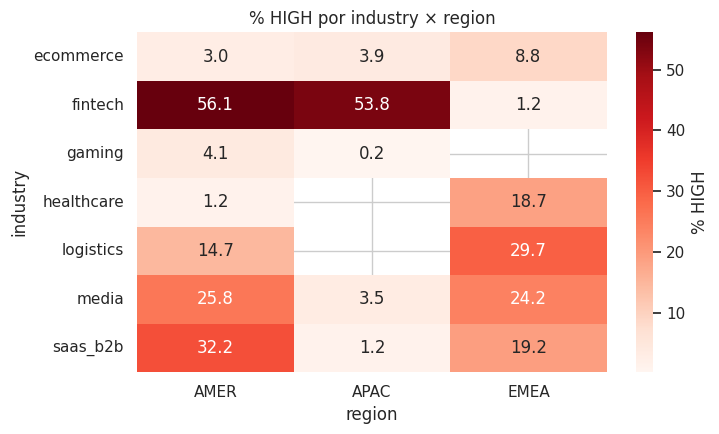

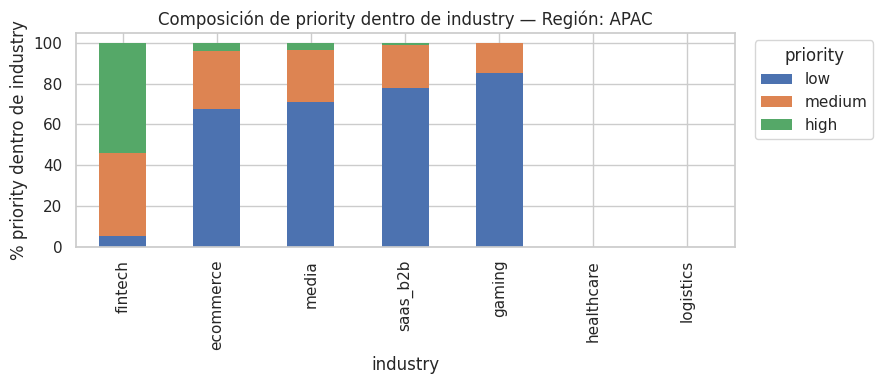

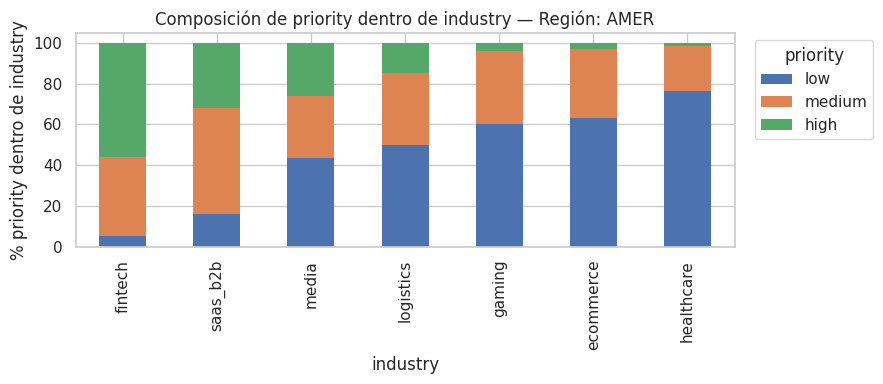

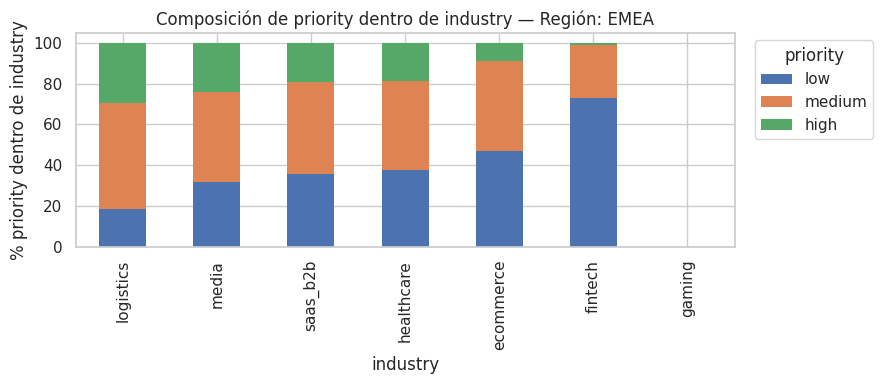

Estandarización por mezcla (global):


,region,high_actual_%,high_std_global_mix_%,mix_effect_pp
0,AMER,21.060,21.760,-0.700
1,EMEA,17.770,16.150,1.620
2,APAC,5.470,6.550,-1.080


In [58]:
# === Paso 2C: industry × region → priority ===

# 0) Normalizaciones ligeras
dc2 = dc.copy()
# Asegurar order en priority
dc2["priority"] = pd.Categorical(dc2["priority"], categories=["low","medium","high"], ordered=True)

# Asegurar etiquetas de texto (evita choques con dtype Categorical)
for c in ["industry","region"]:
    s = dc2[c]
    if pd.api.types.is_categorical_dtype(s):
        s = s.astype("object")
    dc2[c] = s.fillna("Missing").astype(str)

# 1) Tabla de conteos por (industry, region, priority)
cube = dc2.groupby(["industry","region","priority"]).size().unstack("priority", fill_value=0)
# Porcentaje por celda (P(priority | industry, region)) -> filas suman 100%
cube_pct = cube.div(cube.sum(axis=1), axis=0) * 100
cube_pct = cube_pct[["low","medium","high"]]  # asegura orden

# ---------- (1) HEATMAP de % HIGH por industry×region ----------
heat = cube_pct["high"].unstack("region")  # filas=industry, cols=region, valor=%high
plt.figure(figsize=(7.5, 4.5))
sns.heatmap(heat, annot=True, fmt=".1f", cmap="Reds", cbar_kws={"label":"% HIGH"})
plt.title("% HIGH por industry × region")
plt.ylabel("industry"); plt.xlabel("region")
plt.tight_layout()
plt.show()

# ---------- (2) BARRAS 100% apiladas por región ----------
regions = list(dc2["region"].unique())
for r in regions:
    sub = cube_pct.xs(r, level="region")
    # ordenar industrias por %HIGH descendente para esa región
    sub = sub.sort_values("high", ascending=False)
    ax = sub.plot(kind="bar", stacked=True, figsize=(9, 4), edgecolor="none")
    ax.set_title(f"Composición de priority dentro de industry — Región: {r}")
    ax.set_ylabel("% priority dentro de industry")
    ax.set_xlabel("industry")
    ax.legend(title="priority", bbox_to_anchor=(1.02, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

# ---------- (3) ESTANDARIZACIÓN por mezcla (efecto composición) ----------
# w_global(i): peso global de cada industry (distribución de industrias en todo el dataset)
w_global = (dc2["industry"].value_counts(normalize=True)).rename("w_global")

# Para cada región r:
# - w_r(i): peso de cada industry dentro de r
# - p_r(i): %HIGH dentro de (industry=i, region=r)
# - Actual (A_r) = sum_i w_r(i) * p_r(i)
# - Estandarizado (Std_r) = sum_i w_global(i) * p_r(i)   [misma tasa por industria de r, pero mezcla global]
# - Efecto_mix = A_r - Std_r  (positivo si la mezcla de r empuja hacia arriba el %HIGH, negativo si lo reduce)

rows = []
for r in regions:
    # pesos por industry en la región r
    wr = (dc2.loc[dc2["region"]==r, "industry"].value_counts(normalize=True)).rename("w_r")
    # tasas por industry en la región r (%HIGH por industry en esa región)
    pr = cube_pct.xs(r, level="region")["high"] / 100.0  # en proporción

    # Alinear índices
    idx = sorted(set(w_global.index) | set(wr.index) | set(pr.index))
    wr = wr.reindex(idx, fill_value=0.0)
    wg = w_global.reindex(idx, fill_value=0.0)
    pr = pr.reindex(idx).fillna(0.0)

    A = float((wr * pr).sum())           # %HIGH actual de r (en proporción)
    Std = float((wg * pr).sum())         # contrafactual con mezcla global
    mix_effect = A - Std
    rows.append({"region": r,
                 "high_actual_%": A*100,
                 "high_std_global_mix_%": Std*100,
                 "mix_effect_pp": mix_effect*100})

std_table = (pd.DataFrame(rows)
             .sort_values("high_actual_%", ascending=False)
             .reset_index(drop=True)
             .round(2))

print("Estandarización por mezcla (global):")
display(std_table)


Tesis confirmado, la región no tiene una correlación directa con prioridad, es solo un reflejo del tipo de industria por lo que podemos desecharla

/tmp/ipython-input-530776482.py:13: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(s):


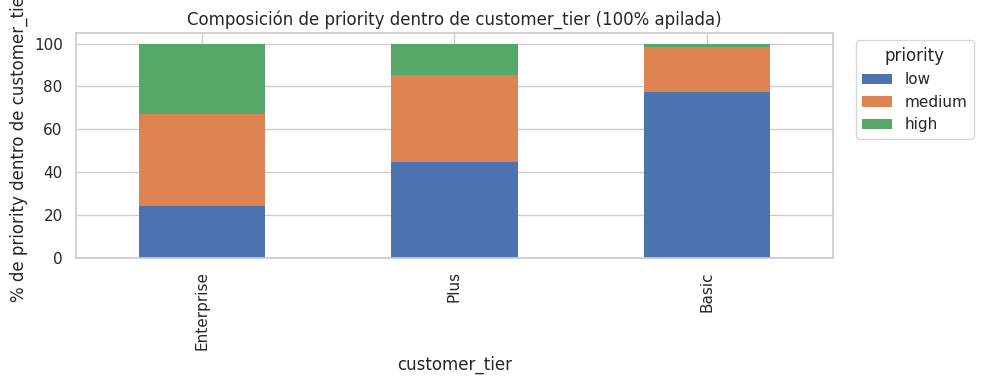

In [51]:
tab_customer_tier  = plot_norm_by_priority(dc, "customer_tier")

/tmp/ipython-input-355337764.py:11: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(s):
/tmp/ipython-input-355337764.py:11: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(s):


industry,ecommerce,fintech,gaming,healthcare,logistics,media,saas_b2b
customer_tier,,,,,,,
Basic,3470,1619,2887,1539,1445,3083,1653
Enterprise,0,2838,0,2196,0,5095,2208
Plus,4202,0,2048,0,2718,3753,9246


industry,ecommerce,fintech,gaming,healthcare,logistics,media,saas_b2b
customer_tier,,,,,,,
Basic,22.110,10.310,18.390,9.810,9.210,19.640,10.530
Enterprise,0.000,23.000,0.000,17.800,0.000,41.300,17.900
Plus,19.130,0.000,9.320,0.000,12.370,17.080,42.090


industry,ecommerce,fintech,gaming,healthcare,logistics,media,saas_b2b
customer_tier,,,,,,,
Basic,45.230,36.320,58.500,41.200,34.710,25.840,12.610
Enterprise,0.000,63.680,0.000,58.800,0.000,42.700,16.850
Plus,54.770,0.000,41.500,0.000,65.290,31.460,70.540


Chi2: 20699.9522 | dof: 12 | p-value: 0.000e+00
Cramér's V: 0.455


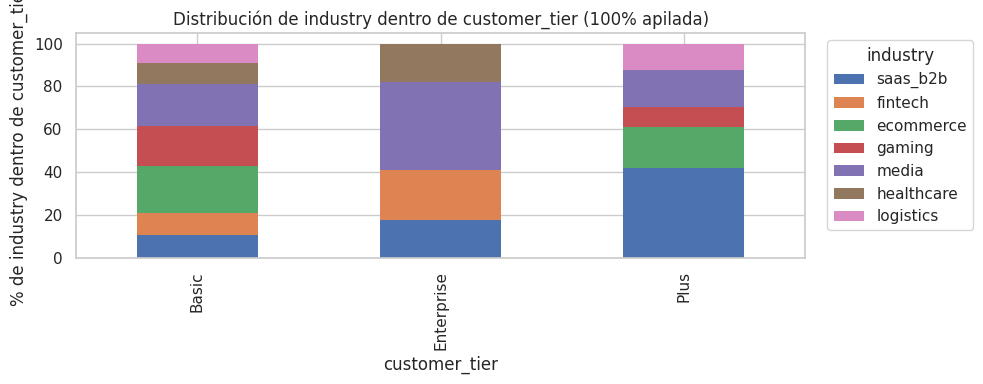

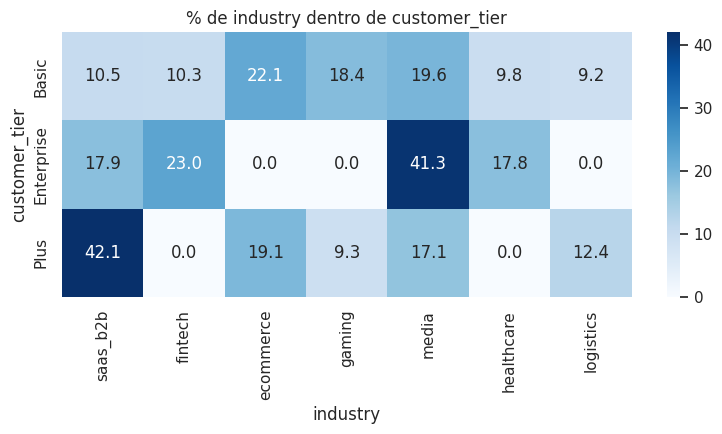

In [59]:

from scipy.stats import chi2_contingency

cat_a = "customer_tier"   # filas
cat_b = "industry"        # columnas

tmp = dc[[cat_a, cat_b]].copy()

# Etiquetas seguras (evita choques con dtype Categorical)
for c in [cat_a, cat_b]:
    s = tmp[c]
    if pd.api.types.is_categorical_dtype(s):
        s = s.astype("object")
    tmp[c] = s.fillna("Missing").astype(str)

# 1) Conteos crudos
ct_counts = pd.crosstab(tmp[cat_a], tmp[cat_b])
display(ct_counts)

# 2) % por fila: P(industry | customer_tier)  (cada fila suma 100%)
ct_row_pct = pd.crosstab(tmp[cat_a], tmp[cat_b], normalize="index") * 100
display(ct_row_pct.round(2))

# 3) % por columna: P(customer_tier | industry) (cada columna suma 100%)
ct_col_pct = pd.crosstab(tmp[cat_a], tmp[cat_b], normalize="columns") * 100
display(ct_col_pct.round(2))

# 4) Chi-cuadrado de independencia + Cramér's V (tamaño de efecto)
chi2, p, dof, expected = chi2_contingency(ct_counts)
n = ct_counts.to_numpy().sum()
phi2 = chi2 / n
r, k = ct_counts.shape
V = np.sqrt(phi2 / min(r - 1, k - 1))
print(f"Chi2: {chi2:.4f} | dof: {dof} | p-value: {p:.3e}")
print(f"Cramér's V: {V:.3f}")

# 5) Barra 100% apilada (ordenamos columnas en un orden fijo si existen)
order_ind = [c for c in ["saas_b2b","fintech","ecommerce","gaming","media","healthcare","logistics","Missing"] if c in ct_row_pct.columns]
ct_plot = ct_row_pct[order_ind] if order_ind else ct_row_pct

ax = ct_plot.plot(kind="bar", stacked=True, figsize=(10,4), edgecolor="none")
ax.set_title("Distribución de industry dentro de customer_tier (100% apilada)")
ax.set_ylabel("% de industry dentro de customer_tier")
ax.set_xlabel("customer_tier")
ax.legend(title="industry", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

# 6) Heatmap de % por fila
plt.figure(figsize=(8,4.5))
sns.heatmap(ct_plot, annot=True, fmt=".1f", cmap="Blues")
plt.title("% de industry dentro de customer_tier")
plt.ylabel("customer_tier"); plt.xlabel("industry")
plt.tight_layout()
plt.show()


/tmp/ipython-input-633244922.py:11: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(s):
/tmp/ipython-input-633244922.py:11: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(s):
/tmp/ipython-input-633244922.py:11: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(s):


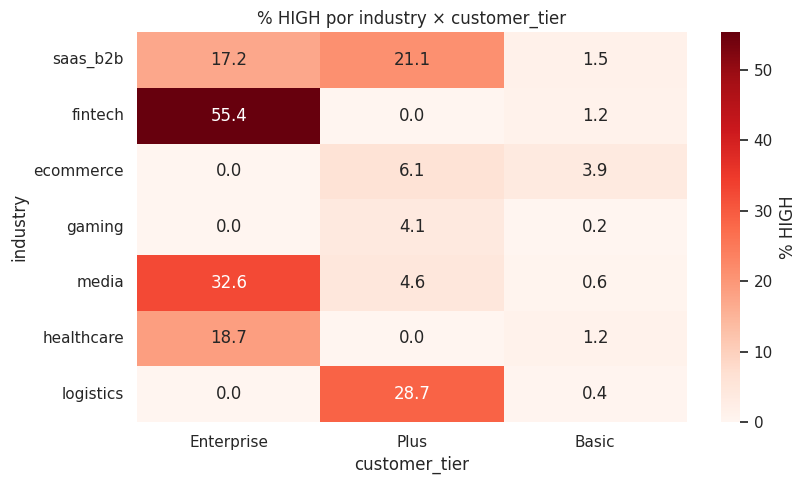

In [60]:
# === Heatmap: % PRIORITY_LEVEL por industry × customer_tier ===


PRIORITY_LEVEL = "high"   # <-- cámbialo a "low" o "medium" si quieres

tmp = dc[["industry","customer_tier","priority"]].copy()

# 1) Normalizar dtypes a texto (evita choques con Categorical y NaN)
for c in ["industry","customer_tier","priority"]:
    s = tmp[c]
    if pd.api.types.is_categorical_dtype(s):
        s = s.astype("object")
    tmp[c] = s.fillna("Missing").astype(str)

# 2) Cubo de conteos por (industry, tier, priority)
cube = tmp.groupby(["industry","customer_tier","priority"]).size().unstack("priority", fill_value=0)

# 3) % PRIORITY_LEVEL dentro de cada (industry, tier)
tot = cube.sum(axis=1)
pct = (cube.get(PRIORITY_LEVEL, pd.Series(0, index=cube.index)) / tot.replace(0, np.nan) * 100).fillna(0)

# 4) Matriz industry × tier con % PRIORITY_LEVEL
heat = pct.unstack("customer_tier").fillna(0)

# (Opcional) Ordenar filas/columnas si existen estos valores
row_order = [x for x in ["saas_b2b","fintech","ecommerce","gaming","media","healthcare","logistics","Missing"] if x in heat.index]
col_order = [x for x in ["Enterprise","Plus","Basic","Missing"] if x in heat.columns]
if row_order: heat = heat.loc[row_order]
if col_order: heat = heat[col_order]

# 5) Dibujar heatmap
plt.figure(figsize=(8.5, 5))
sns.heatmap(heat, annot=True, fmt=".1f", cmap="Reds", cbar_kws={"label": f"% {PRIORITY_LEVEL.upper()}"})
plt.title(f"% {PRIORITY_LEVEL.upper()} por industry × customer_tier")
plt.ylabel("industry"); plt.xlabel("customer_tier")
plt.tight_layout()
plt.show()


ALta correlación entre el nivel de cliente y la prioridad. ahora veamos si el nivel e cliente está relacionado con el tipo de empresa o son independientes

/tmp/ipython-input-530776482.py:13: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(s):


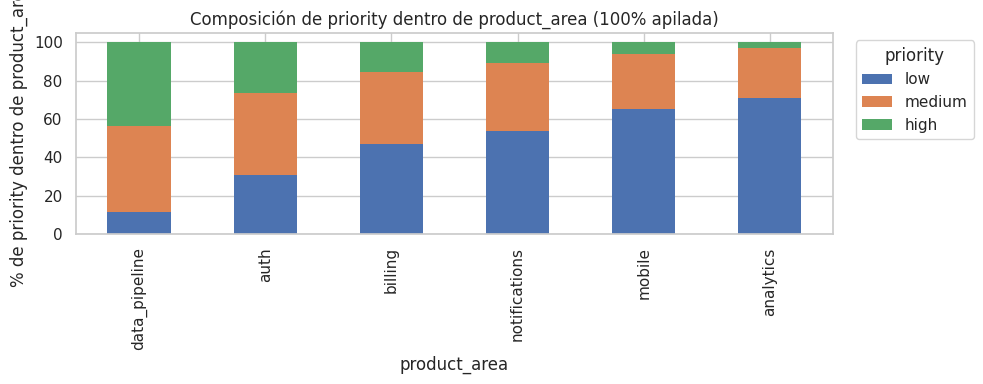

In [52]:
tab_product_area   = plot_norm_by_priority(dc, "product_area")

Alta Relación entee el product_area y el data_pipeline


/tmp/ipython-input-530776482.py:13: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(s):


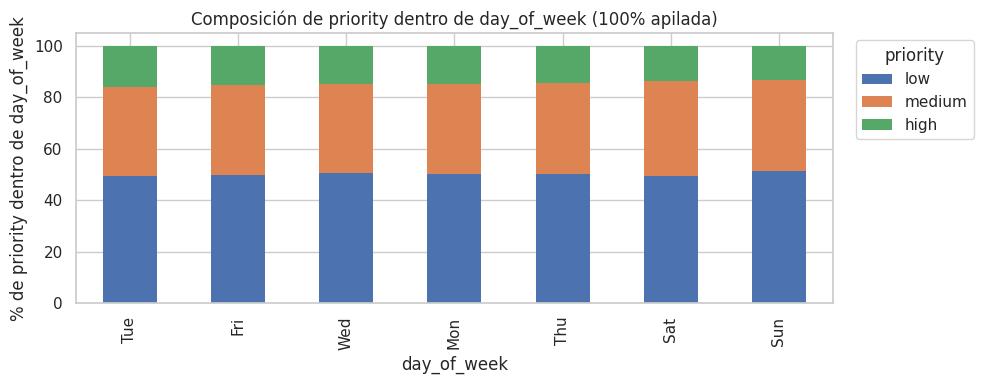

In [53]:
tab_day_of_week    = plot_norm_by_priority(dc, "day_of_week")

In [ ]:
Ninguna corelación entre el día de la select_matching_signature

/tmp/ipython-input-530776482.py:13: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(s):


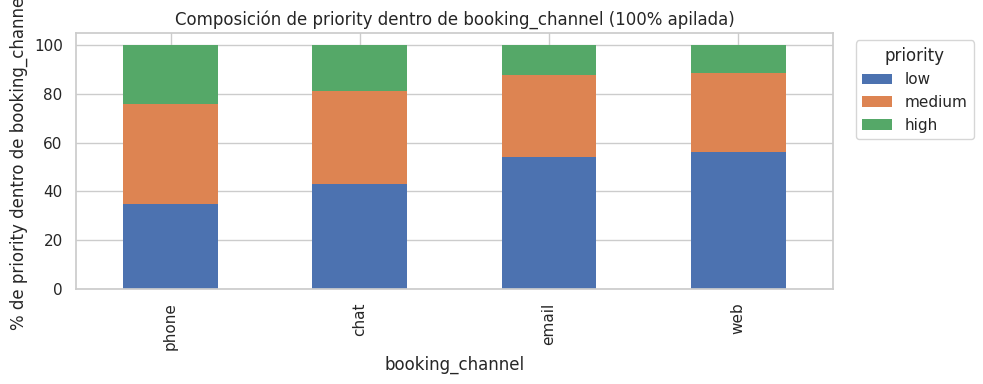

In [54]:
tab_booking        = plot_norm_by_priority(dc, "booking_channel")

Mayor correlación entre el medio utilizsdo para comunicarlse, lo directos tienenmas priridad que lso indirectos

/tmp/ipython-input-530776482.py:13: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(s):


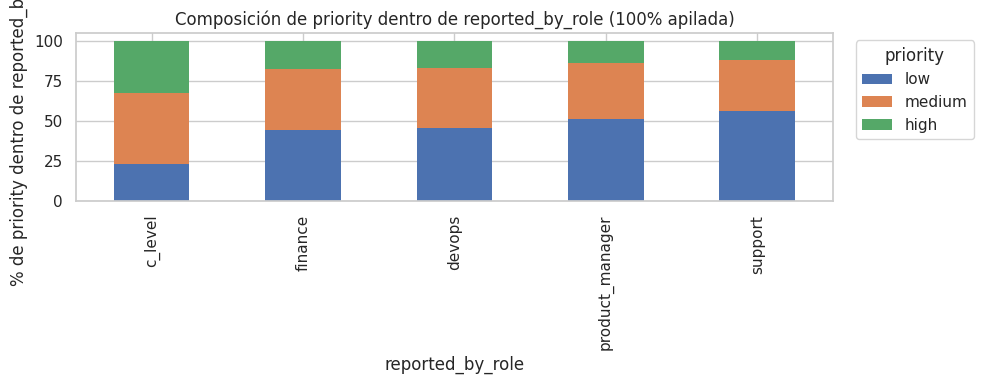

In [55]:
tab_role           = plot_norm_by_priority(dc, "reported_by_role")

In [ ]:
Los C level tinen mas prioridad que los demás

/tmp/ipython-input-3288996461.py:5: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(s):
/tmp/ipython-input-3288996461.py:5: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(s):


industry,ecommerce,fintech,gaming,healthcare,logistics,media,saas_b2b
reported_by_role,,,,,,,
c_level,421,286,224,248,266,710,917
devops,1526,973,884,726,914,2548,2810
finance,845,477,530,394,448,1234,1512
product_manager,1186,665,752,558,622,1783,1964
support,3694,2056,2545,1809,1913,5656,5904


Tasa global de c_level: 6.14%


,% c_level en industria,N_industry,Δ pp vs global
industry,,,
saas_b2b,7.000,13107,0.850
healthcare,6.640,3735,0.500
fintech,6.420,4457,0.270
logistics,6.390,4163,0.250
media,5.950,11931,-0.190
ecommerce,5.490,7672,-0.660
gaming,4.540,4935,-1.600


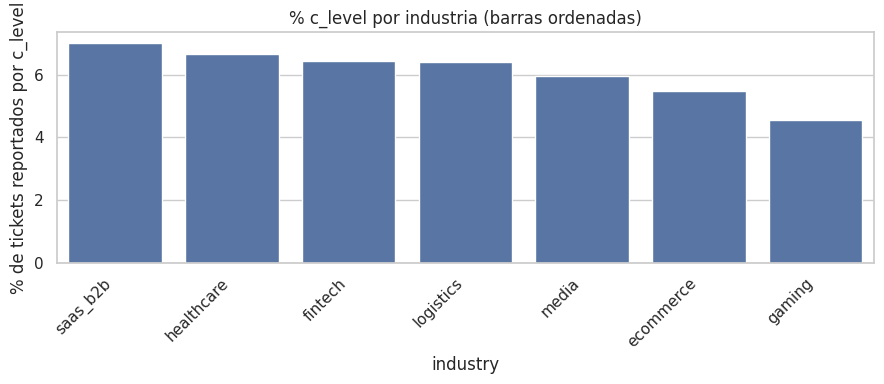

Chi2: 128.66 | gl=24 | p-value=2.709e-16
Cramér’s V (tamaño de efecto): 0.025


In [61]:
# 1) Subset y normalización de tipos (evita choques con 'category')
tmp = dc[["reported_by_role", "industry"]].copy()
for c in ["reported_by_role", "industry"]:
    s = tmp[c]
    if pd.api.types.is_categorical_dtype(s):
        s = s.astype("object")
    tmp[c] = s.fillna("Missing").astype(str).str.strip().str.lower()

# 2) Tabla de conteos role × industry
ct_counts = pd.crosstab(tmp["reported_by_role"], tmp["industry"])
display(ct_counts)

# 3) % de c_level por industria (dentro de cada industry)
col_pct = pd.crosstab(tmp["reported_by_role"], tmp["industry"], normalize="columns") * 100
if "c_level" not in col_pct.index:
    raise ValueError("No se encontró la categoría 'c_level' en reported_by_role (revisa etiquetas).")

p_clevel_by_industry = col_pct.loc["c_level"].sort_values(ascending=False).to_frame(name="% c_level en industria")
n_by_industry = ct_counts.sum(axis=0).rename("N_industry")
summary = p_clevel_by_industry.join(n_by_industry)

# 4) Tasa global de c_level y diferencia en puntos porcentuales
global_rate = (tmp["reported_by_role"] == "c_level").mean() * 100
summary["Δ pp vs global"] = (summary["% c_level en industria"] - global_rate).round(2)

print(f"Tasa global de c_level: {global_rate:.2f}%")
display(summary.round(2))

# 5) Gráfica: % c_level por industria
plt.figure(figsize=(9,4))
sns.barplot(x=summary.index, y=summary["% c_level en industria"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("% de tickets reportados por c_level")
plt.xlabel("industry")
plt.title("% c_level por industria (barras ordenadas)")
plt.tight_layout()
plt.show()

# 6) Chi-cuadrado e intensidad de asociación (Cramér's V)
chi2, p, dof, expected = chi2_contingency(ct_counts)
n = ct_counts.to_numpy().sum()
r, k = ct_counts.shape
V = np.sqrt((chi2 / n) / min(r - 1, k - 1))

print(f"Chi2: {chi2:.2f} | gl={dof} | p-value={p:.3e}")
print(f"Cramér’s V (tamaño de efecto): {V:.3f}")

/tmp/ipython-input-1175746802.py:11: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(s):
/tmp/ipython-input-1175746802.py:11: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(s):


booking_channel,chat,email,phone,web
reported_by_role,,,,
c_level,787,853,428,1004
devops,2596,2912,1308,3565
finance,1296,1565,722,1857
product_manager,1747,2229,881,2673
support,5327,7063,2696,8491


Tasa global de c_level: 6.14%


,% c_level en canal,N_canal,Δ pp vs global
booking_channel,,,
phone,7.090,6035,0.950
chat,6.700,11753,0.550
email,5.830,14622,-0.310
web,5.710,17590,-0.440


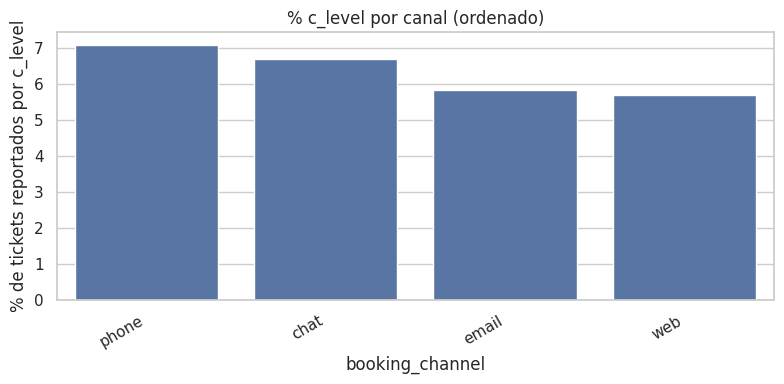

Chi2: 77.42 | gl=12 | p-value=1.276e-11
Cramér’s V (tamaño de efecto): 0.023


In [62]:
# === Relación entre c_level y booking_channel ===


role_col = "reported_by_role"
chan_col = "booking_channel"

# 1) Subset y normalización de tipos (evita choques con 'category')
tmp = dc[[role_col, chan_col]].copy()
for c in [role_col, chan_col]:
    s = tmp[c]
    if pd.api.types.is_categorical_dtype(s):
        s = s.astype("object")
    tmp[c] = s.fillna("Missing").astype(str).str.strip().str.lower()

# 2) Tabla de conteos role × canal
ct_counts = pd.crosstab(tmp[role_col], tmp[chan_col])
display(ct_counts)

# 3) % de c_level por canal (dentro de cada canal)
col_pct = pd.crosstab(tmp[role_col], tmp[chan_col], normalize="columns") * 100
if "c_level" not in col_pct.index:
    print("No se encontró la categoría 'c_level' en", role_col, ". Revisa etiquetas únicas:")
    display(tmp[role_col].value_counts())
else:
    p_clevel_by_chan = col_pct.loc["c_level"].sort_values(ascending=False).to_frame(name="% c_level en canal")
    n_by_chan = ct_counts.sum(axis=0).rename("N_canal")
    summary = p_clevel_by_chan.join(n_by_chan)

    # 4) Tasa global y delta pp
    global_rate = (tmp[role_col] == "c_level").mean() * 100
    summary["Δ pp vs global"] = (summary["% c_level en canal"] - global_rate).round(2)

    print(f"Tasa global de c_level: {global_rate:.2f}%")
    display(summary.round(2))

    # 5) Gráfica
    plt.figure(figsize=(8,4))
    sns.barplot(x=summary.index, y=summary["% c_level en canal"])
    plt.xticks(rotation=30, ha="right")
    plt.ylabel("% de tickets reportados por c_level")
    plt.xlabel("booking_channel")
    plt.title("% c_level por canal (ordenado)")
    plt.tight_layout()
    plt.show()

    # 6) Chi-cuadrado + Cramér's V
    chi2, p, dof, expected = chi2_contingency(ct_counts)
    n = ct_counts.to_numpy().sum()
    r, k = ct_counts.shape
    V = np.sqrt((chi2 / n) / min(r - 1, k - 1))
    print(f"Chi2: {chi2:.2f} | gl={dof} | p-value={p:.3e}")
    print(f"Cramér’s V (tamaño de efecto): {V:.3f}")


/tmp/ipython-input-530776482.py:13: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(s):


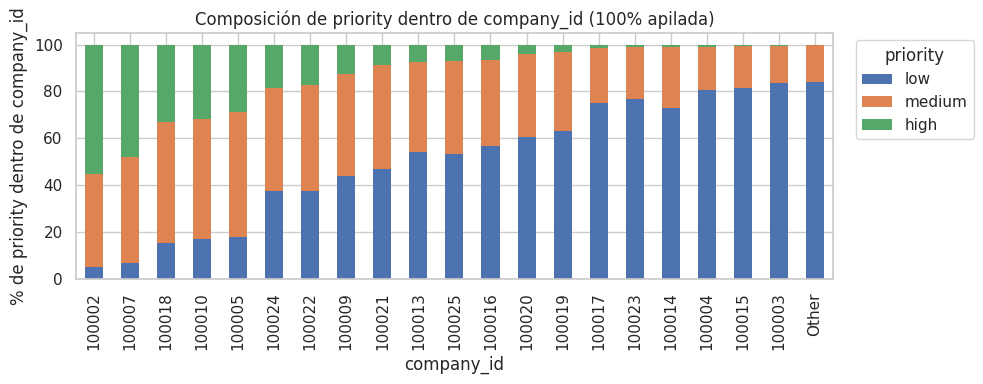

In [56]:
tab_company        = plot_norm_by_priority(dc, "company_id", top_k=20)

In [69]:
# === Resumen por empresa: % de industry, customer_tier, booking_channel y product_area ===

import numpy as np

company_ids = [100002, 100007, 100018, 100010, 100024, 100022, 100009, 100004, 100015, 100003]
ID_COL = "company_id"

# Coerce numérico para filtrar
dc[ID_COL] = pd.to_numeric(dc[ID_COL], errors="coerce")

# Subset con esas empresas
dc_sub = dc[dc[ID_COL].isin(company_ids)].copy()

# Aviso de IDs solicitados que no están en dc_sub (p. ej., 10003 si no existe)
requested_set = set(int(x) for x in company_ids)
seen_set = set(dc_sub[ID_COL].dropna().astype(int).unique().tolist())
missing_ids = sorted(list(requested_set - seen_set))
if missing_ids:
    print("IDs solicitados no presentes en el dataset:", missing_ids)

def pct_table(df, group_col, cat_col, companies_order):
    """
    Retorna una tabla por company_id con N_tickets y % por categoría de cat_col.
    Usa clave string para pivotear y evitar errores de dtype.
    """
    tmp = df[[group_col, cat_col]].copy()

    # Normaliza etiquetas a texto y marca faltantes
    s = tmp[cat_col]
    if pd.api.types.is_categorical_dtype(s):
        s = s.astype("object")
    tmp[cat_col] = s.fillna("Missing").astype(str).str.strip()

    # Clave string para pivot (evita Buffer dtype mismatch)
    tmp["_id_str"] = tmp[group_col].astype("Int64").astype(str)
    companies_str = [str(int(x)) for x in companies_order]

    # Conteos y pivot
    counts = tmp.groupby(["_id_str", cat_col], dropna=False).size().reset_index(name="n")
    tab_counts = counts.pivot(index="_id_str", columns=cat_col, values="n").fillna(0)

    # Orden columnas por frecuencia global en el subset
    col_order = tab_counts.sum(axis=0).sort_values(ascending=False).index
    tab_counts = tab_counts.reindex(columns=col_order)

    # Reordenar filas según lista solicitada (incluye empresas sin casos -> 0)
    tab_counts = tab_counts.reindex(index=companies_str)

    # % por empresa
    den = tab_counts.sum(axis=1)
    tab_pct = (tab_counts.div(den.replace(0, np.nan), axis=0) * 100).fillna(0).round(2)

    # N_tickets
    tab_pct.insert(0, "N_tickets", den.fillna(0).astype(int))

    # Índice de vuelta a int
    tab_pct.index = tab_pct.index.astype(int)
    tab_pct.index.name = group_col
    return tab_pct

# Tablas solicitadas
tbl_industry      = pct_table(dc_sub, ID_COL, "industry",        company_ids)
tbl_tier          = pct_table(dc_sub, ID_COL, "customer_tier",   company_ids)
tbl_booking       = pct_table(dc_sub, ID_COL, "booking_channel", company_ids)
tbl_product_area  = pct_table(dc_sub, ID_COL, "product_area",    company_ids)

print("== % por INDUSTRY (con N por empresa) ==");        display(tbl_industry)
print("== % por CUSTOMER_TIER (con N por empresa) ==");   display(tbl_tier)
print("== % por BOOKING_CHANNEL (con N por empresa) =="); display(tbl_booking)
print("== % por PRODUCT_AREA (con N por empresa) ==");    display(tbl_product_area)



/tmp/ipython-input-3331481988.py:30: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(s):
/tmp/ipython-input-3331481988.py:30: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(s):


== % por INDUSTRY (con N por empresa) ==


/tmp/ipython-input-3331481988.py:30: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(s):
/tmp/ipython-input-3331481988.py:30: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(s):


industry,N_tickets,saas_b2b,media,fintech,healthcare
company_id,,,,,
100002,2838,0.000,0.000,100.000,0.000
100007,2867,0.000,100.000,0.000,0.000
100018,2768,100.000,0.000,0.000,0.000
100010,2750,100.000,0.000,0.000,0.000
100024,2196,0.000,0.000,0.000,100.000
100022,2208,100.000,0.000,0.000,0.000
100009,2228,0.000,100.000,0.000,0.000
100004,1642,100.000,0.000,0.000,0.000
100015,1602,0.000,100.000,0.000,0.000


== % por CUSTOMER_TIER (con N por empresa) ==


customer_tier,N_tickets,Enterprise,Plus,Basic
company_id,,,,
100002,2838,100.000,0.000,0.000
100007,2867,100.000,0.000,0.000
100018,2768,0.000,100.000,0.000
100010,2750,0.000,100.000,0.000
100024,2196,100.000,0.000,0.000
100022,2208,100.000,0.000,0.000
100009,2228,100.000,0.000,0.000
100004,1642,0.000,100.000,0.000
100015,1602,0.000,0.000,100.000


== % por BOOKING_CHANNEL (con N por empresa) ==


booking_channel,N_tickets,web,email,chat,phone
company_id,,,,,
100002,2838,23.750,23.500,30.940,21.810
100007,2867,23.930,21.420,31.570,23.090
100018,2768,23.920,22.470,29.620,23.990
100010,2750,22.870,22.040,32.440,22.650
100024,2196,37.480,28.730,23.270,10.520
100022,2208,34.380,30.570,25.230,9.830
100009,2228,34.690,30.520,25.450,9.340
100004,1642,46.410,34.770,16.020,2.800
100015,1602,45.690,35.270,16.290,2.750


== % por PRODUCT_AREA (con N por empresa) ==


product_area,N_tickets,analytics,auth,notifications,mobile,data_pipeline,billing
company_id,,,,,,,
100002,2838,10.110,25.050,19.520,9.580,6.450,29.280
100007,2867,25.850,14.860,20.020,22.040,12.350,4.880
100018,2768,24.570,17.990,13.370,9.500,23.990,10.590
100010,2750,24.650,18.180,13.200,9.890,24.000,10.070
100024,2196,24.270,30.420,10.610,9.840,19.630,5.240
100022,2208,24.770,19.380,14.860,10.780,19.250,10.960
100009,2228,25.090,15.660,19.430,25.180,9.960,4.670
100004,1642,27.100,25.520,19.980,13.340,0.000,14.070
100015,1602,22.530,17.670,23.600,30.650,0.000,5.560


In [64]:
# === Resumen por empresa: % de industry, customer_tier, booking_channel y product_area ===


company_ids = [100002, 100007, 100018, 100010, 100024, 100022, 100009]
ID_COL = "company_id"

# 1) Asegura que el ID exista y filtra esas empresas
dc[ID_COL] = pd.to_numeric(dc[ID_COL], errors="coerce")  # no usamos Int64 para evitar bugs de índice
dc_sub = dc[dc[ID_COL].isin(company_ids)].copy()

def pct_table(df, group_col, cat_col, companies_order):
    """
    Retorna una tabla por company_id con N_tickets y % por categoría de cat_col.
    Maneja dtype mixtos convirtiendo el ID a string solo para el pivot.
    """
    tmp = df[[group_col, cat_col]].copy()

    # Normaliza etiquetas categóricas a texto
    s = tmp[cat_col]
    if pd.api.types.is_categorical_dtype(s):
        s = s.astype("object")
    tmp[cat_col] = s.fillna("Missing").astype(str).str.strip()

    # Convertimos el ID a string PARA EL PIVOT (evita errores de MultiIndex con dtypes)
    tmp["_id_str"] = tmp[group_col].astype("int64").astype(str)
    companies_str = [str(int(x)) for x in companies_order]

    # Conteos por empresa × categoría
    counts = tmp.groupby(["_id_str", cat_col], dropna=False).size().reset_index(name="n")

    # Pivot: filas = empresa, columnas = categorías
    tab_counts = counts.pivot(index="_id_str", columns=cat_col, values="n").fillna(0)

    # Reordenar columnas por frecuencia global en el subset
    col_order = tab_counts.sum(axis=0).sort_values(ascending=False).index
    tab_counts = tab_counts.reindex(columns=col_order)

    # Reordenar filas según el orden solicitado
    tab_counts = tab_counts.reindex(index=companies_str)

    # % por empresa (fila)
    tab_pct = (tab_counts.div(tab_counts.sum(axis=1), axis=0) * 100).round(2)

    # Añadir N_tickets al inicio
    N = tab_counts.sum(axis=1).astype(int)
    tab_pct.insert(0, "N_tickets", N)

    # Devolver el índice como int para legibilidad
    tab_pct.index = tab_pct.index.astype(int)
    tab_pct.index.name = group_col
    return tab_pct

tbl_industry      = pct_table(dc_sub, ID_COL, "industry",        company_ids)
tbl_tier          = pct_table(dc_sub, ID_COL, "customer_tier",   company_ids)
tbl_booking       = pct_table(dc_sub, ID_COL, "booking_channel", company_ids)
tbl_product_area  = pct_table(dc_sub, ID_COL, "product_area",    company_ids)

print("== % por INDUSTRY (con N por empresa) ==")
display(tbl_industry)

print("== % por CUSTOMER_TIER (con N por empresa) ==")
display(tbl_tier)

print("== % por BOOKING_CHANNEL (con N por empresa) ==")
display(tbl_booking)

print("== % por PRODUCT_AREA (con N por empresa) ==")
display(tbl_product_area)


== % por INDUSTRY (con N por empresa) ==


/tmp/ipython-input-2947887941.py:20: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(s):
/tmp/ipython-input-2947887941.py:20: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(s):
/tmp/ipython-input-2947887941.py:20: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(s):
/tmp/ipython-input-2947887941.py:20: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(s):


industry,N_tickets,saas_b2b,media,fintech,healthcare
company_id,,,,,
100002,2838,0.000,0.000,100.000,0.000
100007,2867,0.000,100.000,0.000,0.000
100018,2768,100.000,0.000,0.000,0.000
100010,2750,100.000,0.000,0.000,0.000
100024,2196,0.000,0.000,0.000,100.000
100022,2208,100.000,0.000,0.000,0.000
100009,2228,0.000,100.000,0.000,0.000


== % por CUSTOMER_TIER (con N por empresa) ==


customer_tier,N_tickets,Enterprise,Plus
company_id,,,
100002,2838,100.000,0.000
100007,2867,100.000,0.000
100018,2768,0.000,100.000
100010,2750,0.000,100.000
100024,2196,100.000,0.000
100022,2208,100.000,0.000
100009,2228,100.000,0.000


== % por BOOKING_CHANNEL (con N por empresa) ==


booking_channel,N_tickets,chat,web,email,phone
company_id,,,,,
100002,2838,30.940,23.750,23.500,21.810
100007,2867,31.570,23.930,21.420,23.090
100018,2768,29.620,23.920,22.470,23.990
100010,2750,32.440,22.870,22.040,22.650
100024,2196,23.270,37.480,28.730,10.520
100022,2208,25.230,34.380,30.570,9.830
100009,2228,25.450,34.690,30.520,9.340


== % por PRODUCT_AREA (con N por empresa) ==


product_area,N_tickets,analytics,auth,data_pipeline,notifications,mobile,billing
company_id,,,,,,,
100002,2838,10.110,25.050,6.450,19.520,9.580,29.280
100007,2867,25.850,14.860,12.350,20.020,22.040,4.880
100018,2768,24.570,17.990,23.990,13.370,9.500,10.590
100010,2750,24.650,18.180,24.000,13.200,9.890,10.070
100024,2196,24.270,30.420,19.630,10.610,9.840,5.240
100022,2208,24.770,19.380,19.250,14.860,10.780,10.960
100009,2228,25.090,15.660,9.960,19.430,25.180,4.670


In [65]:
# === Resumen por empresa: % de industry, tier, booking, product_area y reported_by_role ===

company_ids = [100002, 100007, 100018, 100010, 100024, 100022, 100009]
ID_COL = "company_id"

# 1) Asegura que el ID sea numérico y filtra esas empresas
dc[ID_COL] = pd.to_numeric(dc[ID_COL], errors="coerce")
dc_sub = dc[dc[ID_COL].isin(company_ids)].copy()

def pct_table(df, group_col, cat_col, companies_order):
    """
    Retorna una tabla por company_id con N_tickets y % por categoría de cat_col.
    Maneja dtype mixtos convirtiendo el ID a string solo para el pivot.
    """
    tmp = df[[group_col, cat_col]].copy()

    # Normaliza etiquetas categóricas a texto y marca faltantes
    s = tmp[cat_col]
    if pd.api.types.is_categorical_dtype(s):
        s = s.astype("object")
    tmp[cat_col] = s.fillna("Missing").astype(str).str.strip()

    # ID como string para pivot (evita errores de índice)
    tmp["_id_str"] = tmp[group_col].astype("int64").astype(str)
    companies_str = [str(int(x)) for x in companies_order]

    # Conteos por empresa × categoría
    counts = tmp.groupby(["_id_str", cat_col], dropna=False).size().reset_index(name="n")

    # Pivot: filas = empresa, columnas = categorías
    tab_counts = counts.pivot(index="_id_str", columns=cat_col, values="n").fillna(0)

    # Orden de columnas por frecuencia global en el subset
    col_order = tab_counts.sum(axis=0).sort_values(ascending=False).index
    tab_counts = tab_counts.reindex(columns=col_order)

    # Reordenar filas según el orden solicitado (puede haber empresas con 0 casos en el subset filtrado)
    tab_counts = tab_counts.reindex(index=companies_str)

    # % por empresa (fila)
    den = tab_counts.sum(axis=1)
    tab_pct = (tab_counts.div(den.replace(0, np.nan), axis=0) * 100).fillna(0).round(2)

    # Añadir N_tickets al inicio
    N = den.fillna(0).astype(int)
    tab_pct.insert(0, "N_tickets", N)

    # Índice como int para legibilidad
    tab_pct.index = tab_pct.index.astype(int)
    tab_pct.index.name = group_col
    return tab_pct

tbl_industry       = pct_table(dc_sub, ID_COL, "industry",          company_ids)
tbl_tier           = pct_table(dc_sub, ID_COL, "customer_tier",     company_ids)
tbl_booking        = pct_table(dc_sub, ID_COL, "booking_channel",   company_ids)
tbl_product_area   = pct_table(dc_sub, ID_COL, "product_area",      company_ids)
tbl_reported_role  = pct_table(dc_sub, ID_COL, "reported_by_role",  company_ids)

print("== % por INDUSTRY (con N por empresa) ==")
display(tbl_industry)

print("== % por CUSTOMER_TIER (con N por empresa) ==")
display(tbl_tier)

print("== % por BOOKING_CHANNEL (con N por empresa) ==")
display(tbl_booking)

print("== % por PRODUCT_AREA (con N por empresa) ==")
display(tbl_product_area)

print("== % por REPORTED_BY_ROLE (con N por empresa) ==")
display(tbl_reported_role)


/tmp/ipython-input-3846276465.py:19: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(s):
/tmp/ipython-input-3846276465.py:19: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(s):
/tmp/ipython-input-3846276465.py:19: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(s):


== % por INDUSTRY (con N por empresa) ==


/tmp/ipython-input-3846276465.py:19: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(s):
/tmp/ipython-input-3846276465.py:19: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(s):


industry,N_tickets,saas_b2b,media,fintech,healthcare
company_id,,,,,
100002,2838,0.000,0.000,100.000,0.000
100007,2867,0.000,100.000,0.000,0.000
100018,2768,100.000,0.000,0.000,0.000
100010,2750,100.000,0.000,0.000,0.000
100024,2196,0.000,0.000,0.000,100.000
100022,2208,100.000,0.000,0.000,0.000
100009,2228,0.000,100.000,0.000,0.000


== % por CUSTOMER_TIER (con N por empresa) ==


customer_tier,N_tickets,Enterprise,Plus
company_id,,,
100002,2838,100.000,0.000
100007,2867,100.000,0.000
100018,2768,0.000,100.000
100010,2750,0.000,100.000
100024,2196,100.000,0.000
100022,2208,100.000,0.000
100009,2228,100.000,0.000


== % por BOOKING_CHANNEL (con N por empresa) ==


booking_channel,N_tickets,chat,web,email,phone
company_id,,,,,
100002,2838,30.940,23.750,23.500,21.810
100007,2867,31.570,23.930,21.420,23.090
100018,2768,29.620,23.920,22.470,23.990
100010,2750,32.440,22.870,22.040,22.650
100024,2196,23.270,37.480,28.730,10.520
100022,2208,25.230,34.380,30.570,9.830
100009,2228,25.450,34.690,30.520,9.340


== % por PRODUCT_AREA (con N por empresa) ==


product_area,N_tickets,analytics,auth,data_pipeline,notifications,mobile,billing
company_id,,,,,,,
100002,2838,10.110,25.050,6.450,19.520,9.580,29.280
100007,2867,25.850,14.860,12.350,20.020,22.040,4.880
100018,2768,24.570,17.990,23.990,13.370,9.500,10.590
100010,2750,24.650,18.180,24.000,13.200,9.890,10.070
100024,2196,24.270,30.420,19.630,10.610,9.840,5.240
100022,2208,24.770,19.380,19.250,14.860,10.780,10.960
100009,2228,25.090,15.660,9.960,19.430,25.180,4.670


== % por REPORTED_BY_ROLE (con N por empresa) ==


reported_by_role,N_tickets,support,devops,product_manager,finance,c_level
company_id,,,,,,
100002,2838,41.050,24.030,15.120,11.350,8.460
100007,2867,39.000,26.090,14.960,11.930,8.020
100018,2768,38.480,26.260,14.600,12.250,8.420
100010,2750,39.020,24.870,14.730,13.270,8.110
100024,2196,44.580,19.950,14.710,11.610,9.150
100022,2208,46.650,18.390,14.760,11.680,8.510
100009,2228,44.930,20.560,15.310,11.980,7.230


In [66]:
# === % de EMPRESAS por tipo de cliente (Basic / Plus / Enterprise) ===


ID   = "company_id"
TIER = "customer_tier"

tmp = dc[[ID, TIER]].copy()
tmp[ID] = pd.to_numeric(tmp[ID], errors="coerce")

# Normaliza etiquetas a texto (evita choques con 'category') y marca faltantes
s = tmp[TIER]
if pd.api.types.is_categorical_dtype(s):
    s = s.astype("object")
tmp[TIER] = s.fillna("Missing").astype(str).str.strip()

# Conteos por empresa × tier
counts = (tmp.groupby([ID, TIER]).size()
            .rename("n")
            .reset_index())

# Modo por empresa (si hay empate -> "Mixed")
def pick_mode(g):
    mx = g["n"].max()
    winners = g.loc[g["n"] == mx, TIER].tolist()
    return winners[0] if len(winners) == 1 else "Mixed"

company_tier = (counts.groupby(ID).apply(pick_mode)
                .rename("company_tier_mode")
                .reset_index())

# Distribución de EMPRESAS por tier (conteo y %)
dist_all = (company_tier["company_tier_mode"]
            .value_counts(dropna=False)
            .rename("companies")
            .to_frame())
dist_all["pct_companies"] = (dist_all["companies"] / dist_all["companies"].sum() * 100).round(2)

# Vista principal: solo Basic/Plus/Enterprise (excluye Mixed/Missing)
core_order = ["Basic", "Plus", "Enterprise"]
dist_core = dist_all.reindex(core_order).fillna(0)
dist_core["pct_companies"] = (dist_core["companies"] / dist_core["companies"].sum() * 100).round(2)

print("== Empresas distintas:", company_tier[ID].nunique(), "==\n")
print("== Distribución de EMPRESAS por tier (solo Basic/Plus/Enterprise) ==")
display(dist_core)

print("\n== Distribución completa (incluye 'Mixed' y 'Missing', si los hay) ==")
display(dist_all)


== Empresas distintas: 25 ==

== Distribución de EMPRESAS por tier (solo Basic/Plus/Enterprise) ==


/tmp/ipython-input-846144943.py:12: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(s):
/tmp/ipython-input-846144943.py:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  company_tier = (counts.groupby(ID).apply(pick_mode)


,companies,pct_companies
company_tier_mode,,
Basic,10,40.000
Plus,10,40.000
Enterprise,5,20.000



== Distribución completa (incluye 'Mixed' y 'Missing', si los hay) ==


,companies,pct_companies
company_tier_mode,,
Basic,10,40.000
Plus,10,40.000
Enterprise,5,20.000


== PRIORITY por empresa (%, N) ==


/tmp/ipython-input-453683558.py:27: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(s):


priority,N_tickets,low,medium,high
company_id,,,,
100002,2838,5.210,39.430,55.360
100007,2867,6.840,45.060,48.100
100018,2768,15.610,51.260,33.130
100010,2750,17.050,51.240,31.710
100024,2196,37.480,43.810,18.720
100022,2208,37.590,45.200,17.210
100009,2228,43.850,43.400,12.750


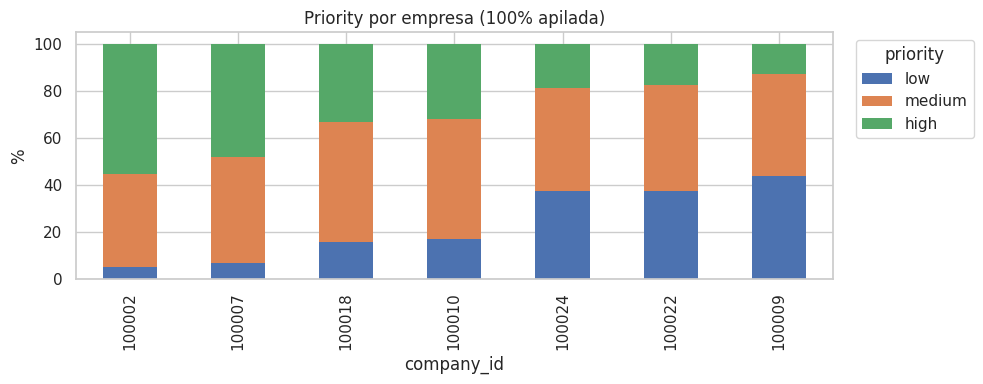

== INDUSTRY por empresa (%, N) ==


/tmp/ipython-input-453683558.py:50: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(s):


industry,N_tickets,saas_b2b,media,fintech,healthcare
company_id,,,,,
100002,2838,0.000,0.000,100.000,0.000
100007,2867,0.000,100.000,0.000,0.000
100018,2768,100.000,0.000,0.000,0.000
100010,2750,100.000,0.000,0.000,0.000
100024,2196,0.000,0.000,0.000,100.000
100022,2208,100.000,0.000,0.000,0.000
100009,2228,0.000,100.000,0.000,0.000


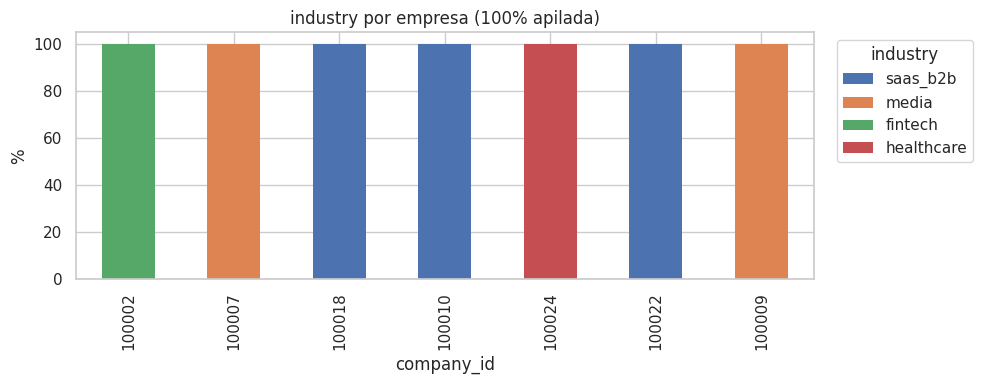

== CUSTOMER_TIER por empresa (%, N) ==


/tmp/ipython-input-453683558.py:50: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(s):


customer_tier,N_tickets,Enterprise,Plus
company_id,,,
100002,2838,100.000,0.000
100007,2867,100.000,0.000
100018,2768,0.000,100.000
100010,2750,0.000,100.000
100024,2196,100.000,0.000
100022,2208,100.000,0.000
100009,2228,100.000,0.000


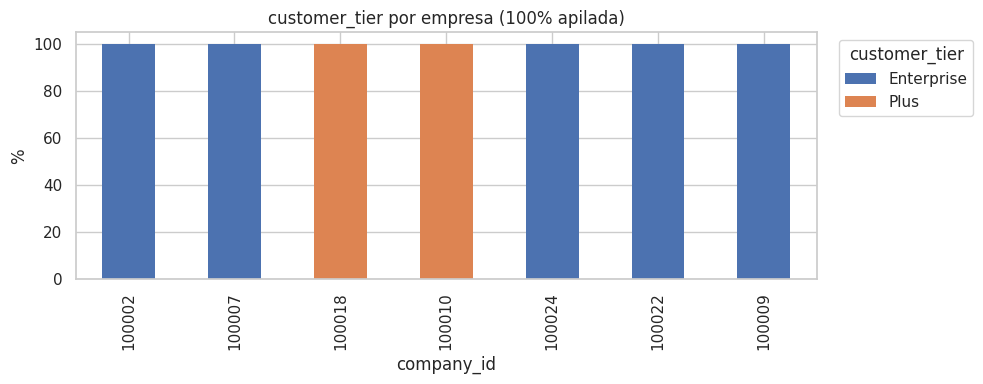

== BOOKING_CHANNEL por empresa (%, N) ==


/tmp/ipython-input-453683558.py:50: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(s):


booking_channel,N_tickets,chat,web,email,phone
company_id,,,,,
100002,2838,30.940,23.750,23.500,21.810
100007,2867,31.570,23.930,21.420,23.090
100018,2768,29.620,23.920,22.470,23.990
100010,2750,32.440,22.870,22.040,22.650
100024,2196,23.270,37.480,28.730,10.520
100022,2208,25.230,34.380,30.570,9.830
100009,2228,25.450,34.690,30.520,9.340


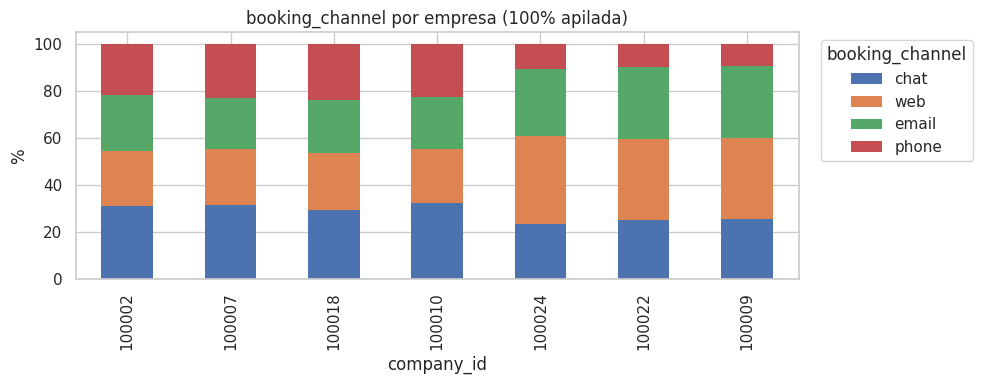

== PRODUCT_AREA por empresa (%, N) ==


/tmp/ipython-input-453683558.py:50: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(s):


product_area,N_tickets,analytics,auth,data_pipeline,notifications,mobile,billing
company_id,,,,,,,
100002,2838,10.110,25.050,6.450,19.520,9.580,29.280
100007,2867,25.850,14.860,12.350,20.020,22.040,4.880
100018,2768,24.570,17.990,23.990,13.370,9.500,10.590
100010,2750,24.650,18.180,24.000,13.200,9.890,10.070
100024,2196,24.270,30.420,19.630,10.610,9.840,5.240
100022,2208,24.770,19.380,19.250,14.860,10.780,10.960
100009,2228,25.090,15.660,9.960,19.430,25.180,4.670


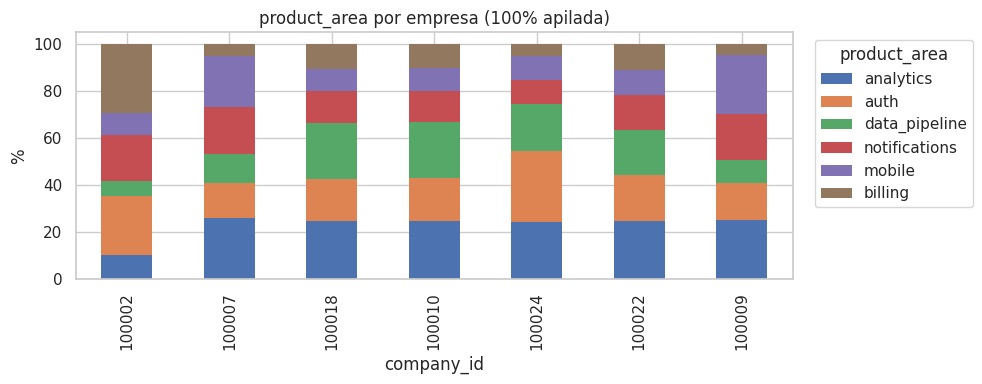

== REPORTED_BY_ROLE por empresa (%, N) ==


/tmp/ipython-input-453683558.py:50: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(s):


reported_by_role,N_tickets,support,devops,product_manager,finance,c_level
company_id,,,,,,
100002,2838,41.050,24.030,15.120,11.350,8.460
100007,2867,39.000,26.090,14.960,11.930,8.020
100018,2768,38.480,26.260,14.600,12.250,8.420
100010,2750,39.020,24.870,14.730,13.270,8.110
100024,2196,44.580,19.950,14.710,11.610,9.150
100022,2208,46.650,18.390,14.760,11.680,8.510
100009,2228,44.930,20.560,15.310,11.980,7.230


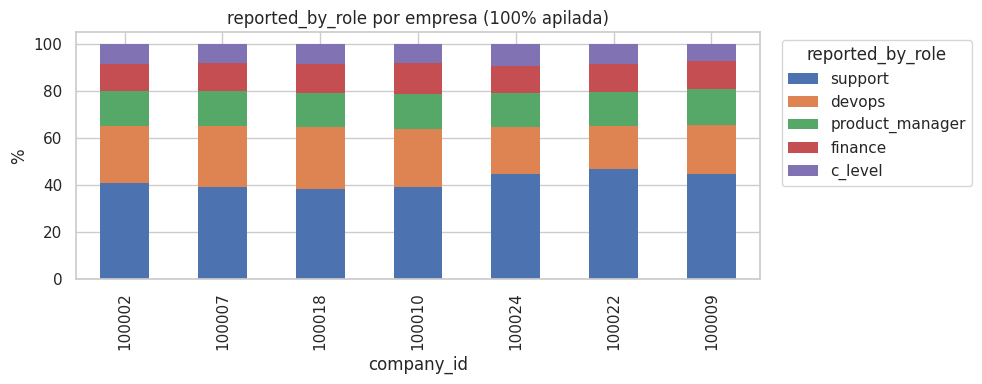

✅ Listo: tablas en 'tables[...]' y gráficas generadas.


In [70]:
# === Comparativo completo por empresa: tablas (%) + barras 100% apiladas ===


# ------------------ Configura aquí tus empresas ------------------
company_ids = [100002, 100007, 100018, 100010, 100024, 100022, 100009]  # <--- ajusta/añade IDs
ID_COL   = "company_id"
TARGET   = "priority"
ORDER_T  = ["low","medium","high"]  # orden lógico de la etiqueta
# Top-K por variable (None = sin agrupar)
TOPK = {
    "industry": 8,
    "product_area": 8,
    "reported_by_role": 6,
    "booking_channel": None,
    "customer_tier": None
}
# ---------------------------------------------------------------

df = dc.copy()

# Asegurar ID numérico para filtrar
df[ID_COL] = pd.to_numeric(df[ID_COL], errors="coerce")

# Asegurar orden en priority (si existe)
if TARGET in df.columns:
    s = df[TARGET]
    if pd.api.types.is_categorical_dtype(s):
        s = s.astype("object")
    s = s.astype(str).str.strip().str.lower()
    # Mapear a los mismos nombres si vinieran en español u otros (ajusta si te aplica)
    m = {"baja":"low","bajo":"low","media":"medium","medio":"medium","neutra":"medium",
         "alta":"high","alto":"high"}
    s = s.map(lambda x: m.get(x, x))
    df[TARGET] = pd.Categorical(s, categories=ORDER_T, ordered=True)

# Subset de empresas
sub = df[df[ID_COL].isin(company_ids)].copy()

# Aviso si pediste IDs que no están presentes
requested_set = set(int(x) for x in company_ids)
seen_set = set(sub[ID_COL].dropna().astype(int).unique().tolist())
missing_ids = sorted(list(requested_set - seen_set))
if missing_ids:
    print("⚠️ IDs solicitados no presentes en el dataset:", missing_ids)

# ---------- utilidades ----------
def _prep_cat(series):
    """Convierte categórica/objeto a str con 'Missing' para nulos."""
    s = series
    if pd.api.types.is_categorical_dtype(s):
        s = s.astype("object")
    return s.fillna("Missing").astype(str).str.strip()

def percent_table_by_company(df_sub, id_col, cat_col, companies_order, top_k=None):
    """
    Devuelve tabla con N_tickets y % por categoría (filas=company_id).
    Maneja dtypes mixtos usando clave string para pivot.
    """
    tmp = df_sub[[id_col, cat_col]].copy()
    tmp[cat_col] = _prep_cat(tmp[cat_col])

    # (Opcional) agrupar categorías poco frecuentes en 'Other' según top_k global del subset
    if top_k is not None:
        top_vals = tmp[cat_col].value_counts().head(top_k).index
        tmp.loc[~tmp[cat_col].isin(top_vals), cat_col] = "Other"

    # clave string para pivot (evita errores de dtype)
    tmp["_id_str"] = tmp[id_col].astype("Int64").astype(str)
    companies_str = [str(int(x)) for x in companies_order]

    # Conteos por empresa × categoría
    counts = tmp.groupby(["_id_str", cat_col], dropna=False).size().reset_index(name="n")

    # Pivot: filas=empresa, columnas=categorías
    tab_counts = counts.pivot(index="_id_str", columns=cat_col, values="n").fillna(0)

    # Orden columnas por frecuencia global
    col_order = tab_counts.sum(axis=0).sort_values(ascending=False).index
    tab_counts = tab_counts.reindex(columns=col_order)

    # Reordenar filas al orden solicitado (empresas sin casos → 0)
    tab_counts = tab_counts.reindex(index=companies_str)

    # % por empresa (cada fila suma 100)
    den = tab_counts.sum(axis=1)
    tab_pct = (tab_counts.div(den.replace(0, np.nan), axis=0) * 100).fillna(0).round(2)

    # Añadir N_tickets
    tab_pct.insert(0, "N_tickets", den.fillna(0).astype(int))

    # Índice a int
    tab_pct.index = tab_pct.index.astype(int)
    tab_pct.index.name = id_col
    return tab_pct

def plot_stacked_pct(table_pct, title, legend_title="categoría"):
    """Grafica barras 100% apiladas desde una tabla de % que incluye N_tickets."""
    data = table_pct.drop(columns=["N_tickets"], errors="ignore")
    ax = data.plot(kind="bar", stacked=True, figsize=(10,4), edgecolor="none")
    ax.set_ylabel("%")
    ax.set_xlabel(ID_COL)
    ax.set_title(title)
    ax.legend(title=legend_title, bbox_to_anchor=(1.02, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

# ---------- PRIORITY por empresa ----------
def priority_composition_by_company(df_sub, id_col, target, companies_order, order_target):
    tmp = df_sub[[id_col, target]].copy()
    tmp["_id_str"] = tmp[id_col].astype("Int64").astype(str)
    companies_str = [str(int(x)) for x in companies_order]
    tab = pd.crosstab(tmp["_id_str"], tmp[target], normalize="index") * 100
    cols = [c for c in order_target if c in tab.columns]
    tab = tab.reindex(columns=cols).reindex(index=companies_str)
    N = tmp.groupby("_id_str").size().reindex(index=companies_str).fillna(0).astype(int)
    tab.insert(0, "N_tickets", N)
    tab.index = tab.index.astype(int); tab.index.name = id_col
    return tab.round(2)

# ======= Generación de tablas y gráficas =======
tables = {}

# Priority
tables["priority"] = priority_composition_by_company(sub, ID_COL, TARGET, company_ids, ORDER_T)
print("== PRIORITY por empresa (%, N) =="); display(tables["priority"])
plot_stacked_pct(tables["priority"], "Priority por empresa (100% apilada)", legend_title="priority")

# Otras categóricas
for col in ["industry", "customer_tier", "booking_channel", "product_area", "reported_by_role"]:
    if col not in sub.columns:
        print(f"⚠️ Columna no encontrada: {col}")
        continue
    tables[col] = percent_table_by_company(sub, ID_COL, col, company_ids, top_k=TOPK.get(col))
    print(f"== {col.upper()} por empresa (%, N) =="); display(tables[col])
    plot_stacked_pct(tables[col], f"{col} por empresa (100% apilada)", legend_title=col)

print("✅ Listo: tablas en 'tables[...]' y gráficas generadas.")


/tmp/ipython-input-1755029988.py:14: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(s):


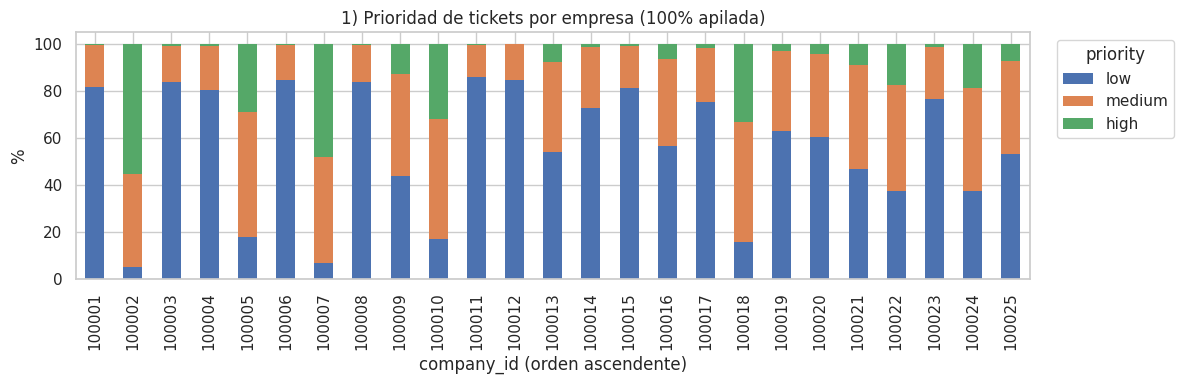

/tmp/ipython-input-1755029988.py:30: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(s):


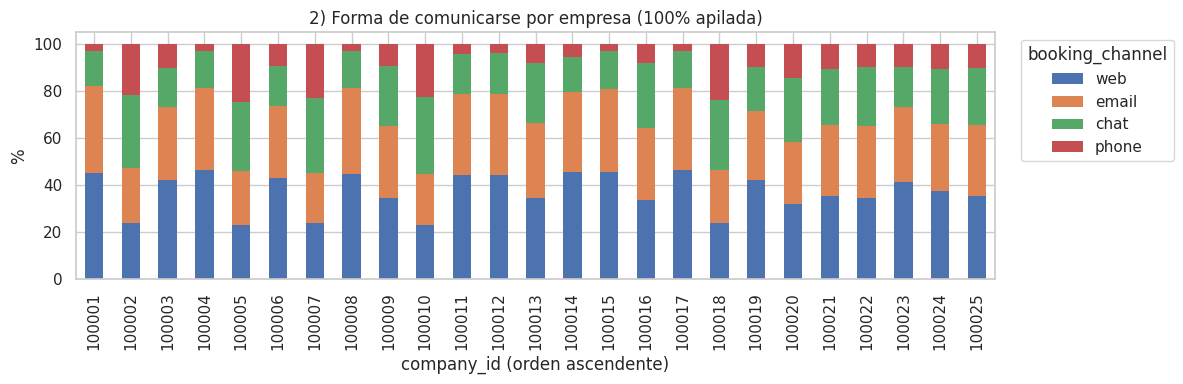

/tmp/ipython-input-1755029988.py:30: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(s):


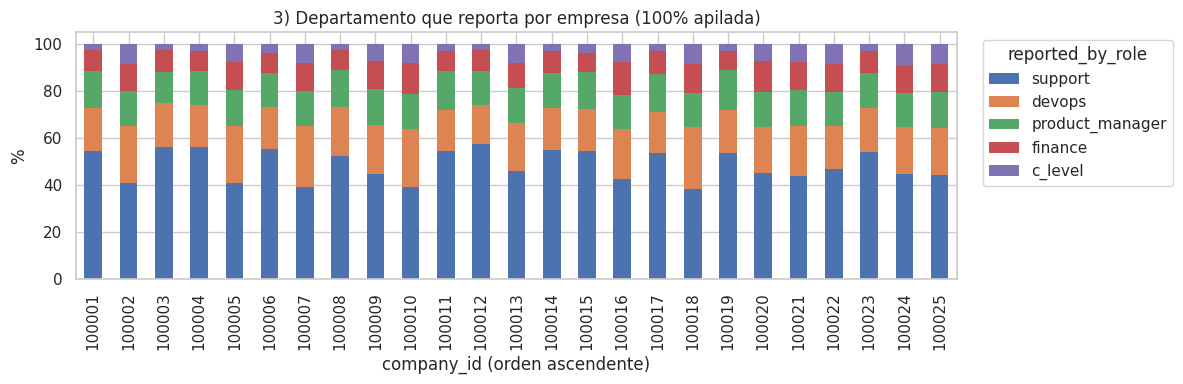

/tmp/ipython-input-1755029988.py:30: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(s):


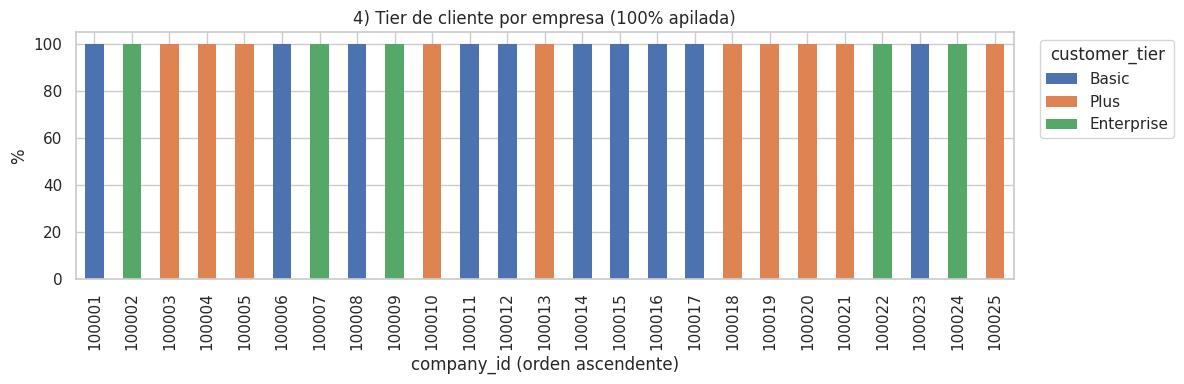

/tmp/ipython-input-1755029988.py:30: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(s):


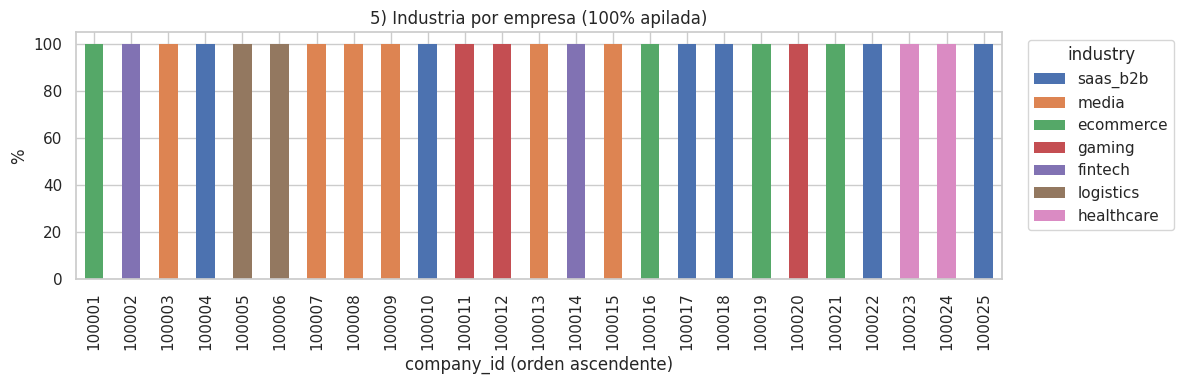

In [71]:
# === Gráficas 100% apiladas por EMPRESA (todas las empresas, sin agrupar en "Other") ===


ID_COL   = "company_id"
TARGET   = "priority"
ORDER_T  = ["low","medium","high"]  # orden lógico del target

df = dc.copy()

# 0) Asegurar tipos y orden
df[ID_COL] = pd.to_numeric(df[ID_COL], errors="coerce")
if TARGET in df.columns:
    s = df[TARGET]
    if pd.api.types.is_categorical_dtype(s):
        s = s.astype("object")
    s = s.astype(str).str.strip().str.lower()
    # mapea, por si venían en español
    m = {"baja":"low","bajo":"low","media":"medium","medio":"medium","neutra":"medium",
         "alta":"high","alto":"high"}
    s = s.map(lambda x: m.get(x, x))
    df[TARGET] = pd.Categorical(s, categories=ORDER_T, ordered=True)

# 1) Lista de TODAS las empresas (orden ascendente)
companies_sorted = (df[ID_COL].dropna().astype(int).unique())
companies_sorted.sort()
companies_str = [str(x) for x in companies_sorted]

def _prep_cat(series):
    s = series
    if pd.api.types.is_categorical_dtype(s):
        s = s.astype("object")
    return s.fillna("Missing").astype(str).str.strip()

def percent_table_by_company(df_sub, id_col, cat_col, order_cols=None):
    """
    Devuelve tabla con N_tickets y % por categoría (filas=empresa, columnas=categorías).
    No agrupa categorías; incluye todas las que existan en el dataset.
    Si 'order_cols' se proporciona, reordena las columnas según esa lista.
    """
    tmp = df_sub[[id_col, cat_col]].copy()
    tmp[cat_col] = _prep_cat(tmp[cat_col])

    # clave string para pivot estable
    tmp["_id_str"] = tmp[id_col].astype("Int64").astype(str)

    # conteos empresa × categoría
    counts = tmp.groupby(["_id_str", cat_col], dropna=False).size().reset_index(name="n")
    tab_counts = counts.pivot(index="_id_str", columns=cat_col, values="n").fillna(0)

    # orden de columnas: si no se especifica, por frecuencia global
    if order_cols is None:
        col_order = tab_counts.sum(axis=0).sort_values(ascending=False).index
    else:
        # filtra a las existentes y luego añade las faltantes al final
        existing = [c for c in order_cols if c in tab_counts.columns]
        rest = [c for c in tab_counts.columns if c not in existing]
        col_order = existing + rest
    tab_counts = tab_counts.reindex(columns=col_order)

    # reordenar filas por ID ascendente (todas las empresas)
    tab_counts = tab_counts.reindex(index=companies_str)

    # % por empresa (cada fila suma 100)
    den = tab_counts.sum(axis=1)
    tab_pct = (tab_counts.div(den.replace(0, np.nan), axis=0) * 100).fillna(0).round(2)

    # N_tickets
    tab_pct.insert(0, "N_tickets", den.fillna(0).astype(int))

    # índice como int
    tab_pct.index = tab_pct.index.astype(int)
    tab_pct.index.name = id_col
    return tab_pct

def plot_stacked_pct(table_pct, title, legend_title):
    data = table_pct.drop(columns=["N_tickets"], errors="ignore")
    ax = data.plot(kind="bar", stacked=True, figsize=(12, 4), edgecolor="none")
    ax.set_ylabel("%")
    ax.set_xlabel(ID_COL + " (orden ascendente)")
    ax.set_title(title)
    ax.legend(title=legend_title, bbox_to_anchor=(1.02, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

# ---------- 1) PRIMERA GRÁFICA: prioridad de tickets por empresa ----------
# Tabla de % para priority (en orden low, medium, high)
tmp = df[[ID_COL, TARGET]].copy()
tmp["_id_str"] = tmp[ID_COL].astype("Int64").astype(str)
tab_pr = pd.crosstab(tmp["_id_str"], tmp[TARGET], normalize="index") * 100
tab_pr = tab_pr.reindex(columns=[c for c in ORDER_T if c in tab_pr.columns])
tab_pr = tab_pr.reindex(index=companies_str).fillna(0).round(2)
N_pr = tmp.groupby("_id_str").size().reindex(index=companies_str).fillna(0).astype(int)
tab_pr.insert(0, "N_tickets", N_pr)
tab_pr.index = tab_pr.index.astype(int); tab_pr.index.name = ID_COL
plot_stacked_pct(tab_pr, "1) Prioridad de tickets por empresa (100% apilada)", "priority")

# ---------- 2) SEGUNDA GRÁFICA: forma de comunicarse por empresa (booking_channel) ----------
tab_booking = percent_table_by_company(df, ID_COL, "booking_channel")
plot_stacked_pct(tab_booking, "2) Forma de comunicarse por empresa (100% apilada)", "booking_channel")

# ---------- 3) TERCERA GRÁFICA: departamento que se comunica por empresa (reported_by_role) ----------
tab_role = percent_table_by_company(df, ID_COL, "reported_by_role")
plot_stacked_pct(tab_role, "3) Departamento que reporta por empresa (100% apilada)", "reported_by_role")

# ---------- 4) CUARTA GRÁFICA: tier de cliente por empresa ----------
# Orden sugerido para columnas: Basic, Plus, Enterprise (si existen)
tab_tier = percent_table_by_company(df, ID_COL, "customer_tier", order_cols=["Basic","Plus","Enterprise","Missing"])
plot_stacked_pct(tab_tier, "4) Tier de cliente por empresa (100% apilada)", "customer_tier")

# ---------- 5) QUINTA GRÁFICA: industria por empresa ----------
tab_industry = percent_table_by_company(df, ID_COL, "industry")
plot_stacked_pct(tab_industry, "5) Industria por empresa (100% apilada)", "industry")

# (Opcional) si quieres ver las tablas en la salida:
# display(tab_pr); display(tab_booking); display(tab_role); display(tab_tier); display(tab_industry)


In [72]:
display(tab_pr)          # 1) Prioridad por empresa (%, incluye N_tickets)
display(tab_booking)     # 2) Forma de comunicarse (booking_channel) por empresa
display(tab_role)        # 3) Departamento que reporta (reported_by_role) por empresa
display(tab_tier)        # 4) Tier de cliente por empresa (Basic/Plus/Enterprise)
display(tab_industry)    # 5) Industria por empresa


priority,N_tickets,low,medium,high
company_id,,,,
100001,1497,81.830,17.770,0.400
100002,2838,5.210,39.430,55.360
100003,1595,83.700,15.670,0.630
100004,1642,80.450,18.700,0.850
100005,2718,18.100,53.200,28.700
100006,1445,84.840,14.740,0.420
100007,2867,6.840,45.060,48.100
100008,1481,83.730,15.870,0.410
100009,2228,43.850,43.400,12.750


booking_channel,N_tickets,web,email,chat,phone
company_id,,,,,
100001,1497,44.960,37.070,15.160,2.810
100002,2838,23.750,23.500,30.940,21.810
100003,1595,42.010,31.100,16.800,10.090
100004,1642,46.410,34.770,16.020,2.800
100005,2718,23.110,22.770,29.580,24.540
100006,1445,43.110,30.730,16.680,9.480
100007,2867,23.930,21.420,31.570,23.090
100008,1481,44.560,36.660,15.670,3.110
100009,2228,34.690,30.520,25.450,9.340


reported_by_role,N_tickets,support,devops,product_manager,finance,c_level
company_id,,,,,,
100001,1497,54.510,18.370,15.560,9.020,2.540
100002,2838,41.050,24.030,15.120,11.350,8.460
100003,1595,56.300,18.810,13.170,9.220,2.510
100004,1642,56.210,17.970,14.370,8.590,2.860
100005,2718,41.060,23.950,15.340,11.920,7.730
100006,1445,55.160,18.200,14.190,8.580,3.880
100007,2867,39.000,26.090,14.960,11.930,8.020
100008,1481,52.190,20.860,16.000,8.240,2.700
100009,2228,44.930,20.560,15.310,11.980,7.230


customer_tier,N_tickets,Basic,Plus,Enterprise
company_id,,,,
100001,1497,100.000,0.000,0.000
100002,2838,0.000,0.000,100.000
100003,1595,0.000,100.000,0.000
100004,1642,0.000,100.000,0.000
100005,2718,0.000,100.000,0.000
100006,1445,100.000,0.000,0.000
100007,2867,0.000,0.000,100.000
100008,1481,100.000,0.000,0.000
100009,2228,0.000,0.000,100.000


industry,N_tickets,saas_b2b,media,ecommerce,gaming,fintech,logistics,healthcare
company_id,,,,,,,,
100001,1497,0.000,0.000,100.000,0.000,0.000,0.000,0.000
100002,2838,0.000,0.000,0.000,0.000,100.000,0.000,0.000
100003,1595,0.000,100.000,0.000,0.000,0.000,0.000,0.000
100004,1642,100.000,0.000,0.000,0.000,0.000,0.000,0.000
100005,2718,0.000,0.000,0.000,0.000,0.000,100.000,0.000
100006,1445,0.000,0.000,0.000,0.000,0.000,100.000,0.000
100007,2867,0.000,100.000,0.000,0.000,0.000,0.000,0.000
100008,1481,0.000,100.000,0.000,0.000,0.000,0.000,0.000
100009,2228,0.000,100.000,0.000,0.000,0.000,0.000,0.000
